## Dataset Overview
Our datasets were taken from [InsideAirbnb](http://insideairbnb.com/get-the-data.html) and were last updated in October 2020.


1. [Listings](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/data/listings.csv.gz) (Detailed listings data for New York City.)
2. [Reviews](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/data/reviews.csv.gz) (Detailed review data for listings in New York City.)
3. [Calendar](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/data/calendar.csv.gz) (Detailed calendar data for listings in New York City.)
4. [Neighborhoods](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/visualisations/neighbourhoods.csv) (Lists of neighborhoods and boroughs in New York City.)



## Import Required Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip install missingno
import missingno as msno
import math
from os import path

# plotly imports
! pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# wordcloud imports
! pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# folium imports
! pip install folium
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# importing models for preprocessing and splitting data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# importing packages for classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 5.5 MB/s eta 0:00:00


## Reading in Data

In [2]:
listings = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/listings.csv.gz")
calendar_2020_1 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/calendar.csv.gz")
reviews = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/reviews.csv.gz", parse_dates=['date'])
neighborhoods = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/visualisations/neighbourhoods.csv")

/var/folders/mq/sl3409bs05937klcjgg0zwr80000gn/T/ipykernel_2278/1565368984.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/listings.csv.gz")


# Inspecting the Datasets

## Listings DataFrame


**Here is a glimpse of the Listings dataframe.**

In [3]:
listings.head(2)

id                                      listing_url  \
0  801749842377802394  https://www.airbnb.com/rooms/801749842377802394   
1  765948794133787266  https://www.airbnb.com/rooms/765948794133787266   

        scrape_id last_scraped       source                   name  \
0  20230306014634   2023-03-06  city scrape  A home away from home   
1  20230306014634   2023-03-06  city scrape        Brooklyn Refuge   

                                         description neighborhood_overview  \
0  The whole group will be comfortable in this sp...                   NaN   
1    Take a break and unwind at this peaceful oasis.                   NaN   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  495455523  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...  488760226  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                        4.92                   4.85                4.92   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                t                              2   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0               NaN  
1                                           0              4.29  

[2 rows x 75 columns]

**How many observations and features are in the Listings dataframe?**

There are 44666 unique observations (listings) and 74 features.

In [4]:
listings.shape

(42931, 75)

In [5]:
# Display the number of unique ids
len(listings.id.unique())

42931

**Here is an overview of the Listings dataframe.**

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42931 non-null  int64  
 1   listing_url                                   42931 non-null  object 
 2   scrape_id                                     42931 non-null  int64  
 3   last_scraped                                  42931 non-null  object 
 4   source                                        42931 non-null  object 
 5   name                                          42919 non-null  object 
 6   description                                   42178 non-null  object 
 7   neighborhood_overview                         24870 non-null  object 
 8   picture_url                                   42931 non-null  object 
 9   host_id                                       42931 non-null 

## Calendar DataFrame

**Here is a glimpse of the Listings dataframe.**

In [8]:
calendar_2020_1.head(2)

listing_id        date available    price adjusted_price  minimum_nights  \
0        2595  2023-03-07         t  $150.00        $150.00            30.0   
1        2595  2023-03-08         t  $150.00        $150.00            30.0   

   maximum_nights  
0          1125.0  
1          1125.0

**How many observations and features are in the Calendar dataframe?**

There are 18747307 observations and 7 features.



In [9]:
calendar_2020_1.shape

(15664741, 7)

**Here is an overview of the Calendar dataframe.**

In [10]:
calendar_2020_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15664741 entries, 0 to 15664740
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 836.6+ MB


**Summary statistics for the numeric columns (Price will be converted from an object later in the notebook):**

In [11]:
calendar_2020_1[['minimum_nights','maximum_nights']].describe()

minimum_nights  maximum_nights
count    1.566402e+07    1.566402e+07
mean     2.236651e+01    1.570195e+06
std      4.653937e+01    5.801663e+07
min      1.000000e+00    1.000000e+00
25%      2.000000e+00    3.650000e+02
50%      8.000000e+00    1.125000e+03
75%      3.000000e+01    1.125000e+03
max      1.250000e+03    2.147484e+09

## Reviews DataFrame

**Here is a glimpse of the Reviews dataframe.**

In [12]:
reviews.head(2)

listing_id     id       date  reviewer_id reviewer_name  \
0        2595  17857 2009-11-21        50679          Jean   
1        2595  19176 2009-12-05        53267          Cate   

                                            comments  
0  Notre séjour de trois nuits.\r<br/>Nous avons ...  
1                                  Great experience.

**How many observations and features are in the Reviews dataframe?**

There are 1003064 unique observations (comments) and 6 features.

In [13]:
reviews.shape

(1110024, 6)

In [14]:
# Display the number of unique ids
len(reviews.id.unique())

1109973

**Here is an overview of the Reviews dataframe.**

In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110024 entries, 0 to 1110023
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   listing_id     1110024 non-null  int64         
 1   id             1110024 non-null  int64         
 2   date           1110024 non-null  datetime64[ns]
 3   reviewer_id    1110024 non-null  int64         
 4   reviewer_name  1110020 non-null  object        
 5   comments       1109804 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 50.8+ MB


**When was the oldest comment posted and when was the latest posted?**

The oldest comment was posted on April 23, 2009 and the latest was posted on October 11, 2020

In [16]:
print(reviews.date.min())
print(reviews.date.max())

2009-04-13 00:00:00
2023-03-06 00:00:00


## Neighborhoods DataFrame

**Here is a glimpse of the Neighborhoods dataframe.**

In [17]:
neighborhoods.head(2)

neighbourhood_group neighbourhood
0               Bronx      Allerton
1               Bronx    Baychester

**How many observations are in the Neighborhoods dataframe?**

There are 5 boroughs and 230 unique observations (neighborhoods).

In [18]:
neighborhoods.shape

(230, 2)

In [19]:
# Desplay the number of unique boroughs
len(neighborhoods.neighbourhood_group.unique())

5

In [20]:
# Display the number of unique neighborhoods
len(neighborhoods.neighbourhood.unique())

230

**Here is an overview of the Neighborhoods dataframe.**

In [21]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  230 non-null    object
 1   neighbourhood        230 non-null    object
dtypes: object(2)
memory usage: 3.7+ KB


**Summary statistics for the Neighborhoods dataframe.**

In [21]:
neighborhoods.describe()

neighbourhood_group neighbourhood
count                  230           230
unique                   5           230
top                 Queens      Allerton
freq                    53             1

**How many neighborhoods are there in each borough?**

Queens has the most neighborhoods (53) and Manhattan has the least (32).

In [22]:
neighborhoods.groupby('neighbourhood_group').count()

neighbourhood
neighbourhood_group               
Bronx                           49
Brooklyn                        48
Manhattan                       32
Queens                          53
Staten Island                   48

**A preview of the neighborhoods within a borough.**

In [23]:
# Take Manhattan for example
neighborhoods[neighborhoods['neighbourhood_group'] == "Manhattan"].head()

neighbourhood_group      neighbourhood
97            Manhattan  Battery Park City
98            Manhattan            Chelsea
99            Manhattan          Chinatown
100           Manhattan       Civic Center
101           Manhattan        East Harlem

# Cleaning the Datasets

## Listings DataFrame

After inspecting the Listings dataframe, we now proceed to analyze potential misssing values and outliers. We will also ensure that data within each of the columns is of the right datatype and format, and is ready to be used in the rest of the EDA phase.

**How many missing values are there in each column?**

There are three empty columns -- "bathrooms", "calendar_updated", and "license".

In [24]:
null_vals = listings.isnull().sum()
null_vals[null_vals > 0].sort_values(ascending=False)

bathrooms                      42931
calendar_updated               42931
license                        42930
host_about                     19672
neighborhood_overview          18061
neighbourhood                  18060
host_response_time             14532
host_response_rate             14532
host_acceptance_rate           12564
review_scores_value            10746
review_scores_location         10746
review_scores_checkin          10743
review_scores_accuracy         10739
review_scores_communication    10734
review_scores_cleanliness      10729
last_review                    10304
reviews_per_month              10304
review_scores_rating           10304
first_review                   10304
host_location                   9086
host_neighbourhood              8650
bedrooms                        3874
beds                             929
description                      753
bathrooms_text                    75
host_is_superhost                 25
minimum_maximum_nights            14
m

**Converting "price" column to the correct format and data type.**

In [25]:
# First converting price into a string to remove '$' and ',' and then converting it into a float 
listings['price'] = listings['price'].astype('string')
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')
listings['price'] = listings['price'].astype('float')
listings['price']

/var/folders/mq/sl3409bs05937klcjgg0zwr80000gn/T/ipykernel_2278/3451744303.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$','')


0        143.0
1         30.0
2        157.0
3         89.0
4        125.0
         ...  
42926     85.0
42927    208.0
42928    125.0
42929     50.0
42930    338.0
Name: price, Length: 42931, dtype: float64

**How many listings are with a price of $0?**

There are 25 observations (listings) where the price is $0.

In [26]:
# Identifying rows with price of the listing as $0
listings[listings['price'] == 0]['price'].count()

27

**How many listings have no beds?**

There are 1595 listings with no beds, which equals to 3.57% of the total number of listings.

In [27]:
# Identifying rows with no beds
listings[listings['beds'] == 0]['beds'].count() / len(listings)

0.0

**Which listing has the most beds?**

We learned from the summary statistics that the maximum number of beds is 40 among all listings. After inspecting this outlier, we found that this observation is reasonable and should not be dropped from the dataframe since it says it hosts 16 people.

In [28]:
# Inspecting rows with 40 beds
listings[listings['beds'] == 40]

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, license, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month]
Index: []

[0 rows x 75 columns]

We will drop all observations in which the price, number of beds, or accommodates is zero since these values would not make sense in context.

In [29]:
drop_df = listings[(listings['beds'] == 0) | (listings['price'] == 0) | (listings['accommodates'] == 0)].index
listings.drop(drop_df, inplace=True)

After finding that the median number of beds and bedrooms is 1, we have filled the missing values for both these columns with 1.

In [30]:
print(listings['beds'].median())
print(listings['bedrooms'].median())

listings.beds = listings.beds.fillna(1)
listings.bedrooms = listings.bedrooms.fillna(1)

1.0
1.0


We will also remove observations with missing values in any of these columns.

In [31]:
listings.dropna(subset=['first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month'], thresh=10, inplace=True)

Lastly, we decide to drop the columns that are not significant to EDA and furthur analysis.

In [32]:
listings.drop(['scrape_id', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'bathrooms','calendar_updated','license', 'host_total_listings_count', 'calendar_last_scraped'], axis=1, inplace=True)

After cleaning the Listings dataframe, we now have 31880 unique observations (listings) and 60 features.

In [33]:
listings.shape

(32165, 61)

### Looking into Host-Related Data

**Are there any missing values within host-related data?**

<Axes: >

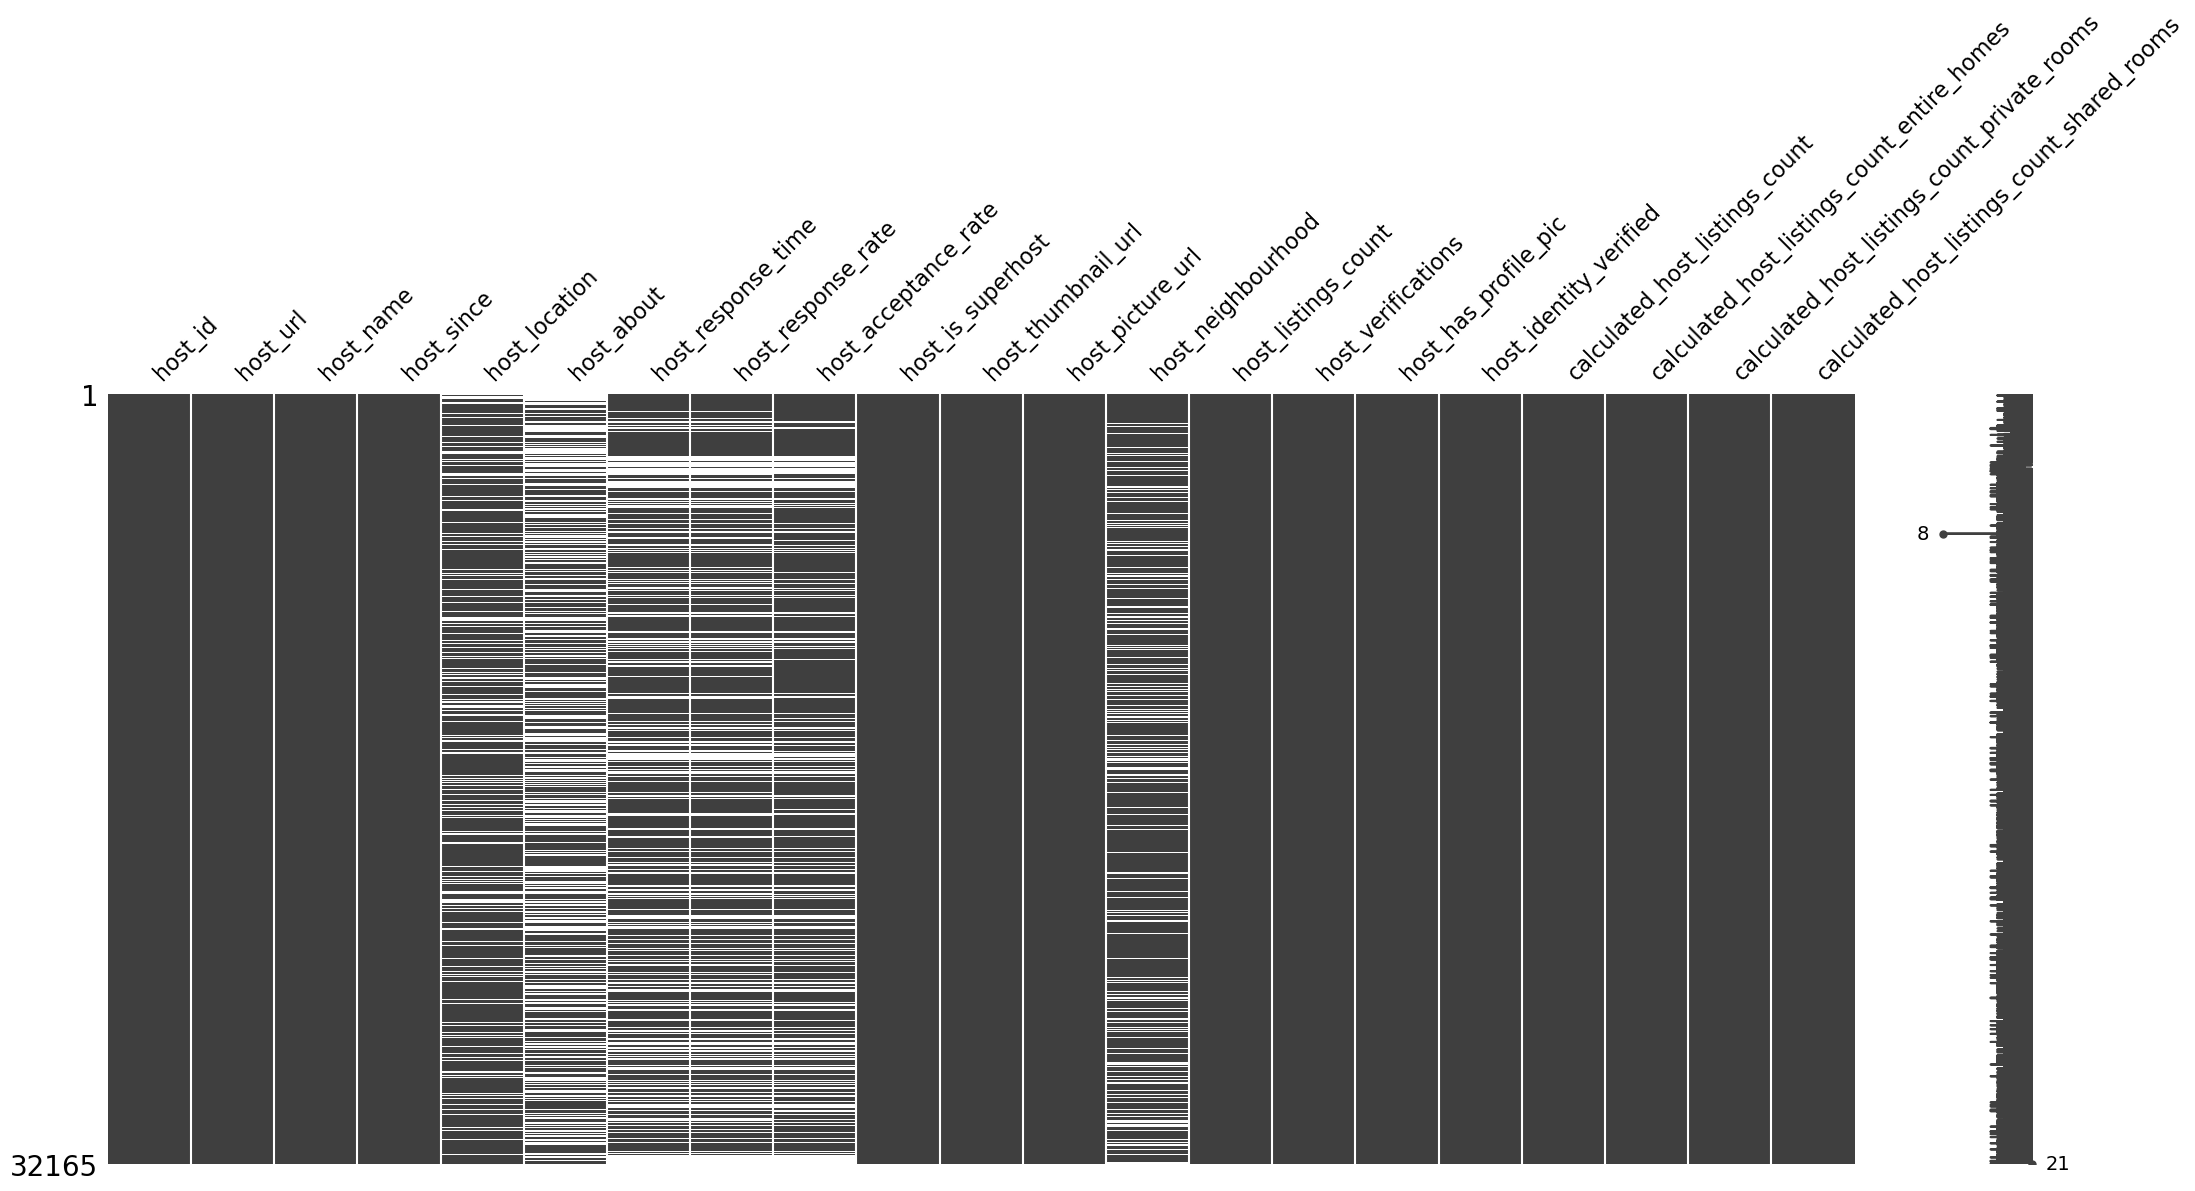

In [34]:
msno.matrix(listings[['host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']])

**Converting columns to the correct data type.**

In [35]:
listings.calculated_host_listings_count_shared_rooms = listings.calculated_host_listings_count_shared_rooms.astype('float')
listings.calculated_host_listings_count_private_rooms = listings.calculated_host_listings_count_private_rooms.astype('float')
listings.calculated_host_listings_count_entire_homes = listings.calculated_host_listings_count_entire_homes.astype('float')
listings.calculated_host_listings_count = listings.calculated_host_listings_count.astype('float')

After adding up the count of all room types, the total does not exceed the calculated_host_listings_count.

In [36]:
check_condition = (listings['calculated_host_listings_count_private_rooms'] + listings['calculated_host_listings_count_entire_homes'] + listings['calculated_host_listings_count_shared_rooms']) > listings['calculated_host_listings_count']
listings[check_condition]

Empty DataFrame
Columns: [id, listing_url, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month]
Index: []

[0 rows x 61 columns]

**Examine the distribution of the host acceptance rate.**

In [37]:
listings['host_acceptance_rate'].value_counts().head()

100%    7861
99%     1749
98%     1239
97%     1156
96%      735
Name: host_acceptance_rate, dtype: int64

**Converting columns to the correct format and data type.**

In [38]:
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].astype("string")
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%','')
listings['host_acceptance_rate'] = pd.to_numeric(listings['host_acceptance_rate'], errors='coerce')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].apply(lambda x: x/100 if isinstance(x, float) else None)

**How many null values are there?**

There are 10147 null values in host_acceptance_rate because Airbnb did not report this for sellers with less reviews and data. We're not imputing the null values at this point because we won't be using this feature for our models.

In [39]:
listings['host_acceptance_rate'].isnull().sum()

8116

**Examine the distribution of the host reponse rate.**

In [40]:
listings['host_response_rate'].value_counts().head()

100%    16628
90%       742
99%       534
98%       360
80%       301
Name: host_response_rate, dtype: int64

**Converting the columns to the correct format and data types.**

In [50]:
listings['host_response_rate'] = listings['host_response_rate'].astype("string")
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%','')
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'], errors='coerce')
listings['host_response_rate'] = listings['host_response_rate'].apply(lambda x: x/100 if isinstance(x, float) else None)
listings['host_response_time'] = listings['host_response_time'].astype('string')
listings['host_is_superhost'] = listings['host_is_superhost'].astype('string')

**Examine the distribution of host_response_time.**

In [51]:
listings['host_response_time'].value_counts()

within an hour        15052
within a few hours     4329
within a day           2405
a few days or more      429
Name: host_response_time, dtype: Int64

**What is the average response rate for each response time category?**

Hosts who response within an hour have a 97.7% response rate on average.

In [52]:
listings.groupby('host_response_time')['host_response_rate'].mean()

host_response_time
a few days or more    0.001140
within a day          0.008466
within a few hours    0.009654
within an hour        0.009866
Name: host_response_rate, dtype: float64

**What is the relationship between response rate and response time?**

Below is a visualization of the relationship between them. We found that hosts who usually reponse within an hour have the highest response rate on average, while hosts who tend to response after a few days or more have the lowest response rate.

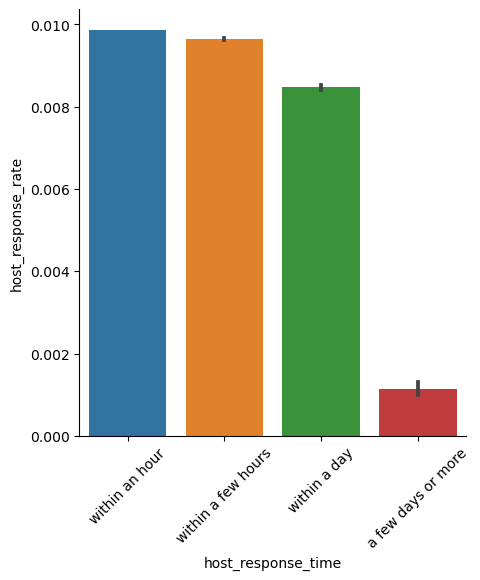

In [53]:
sns.catplot(x='host_response_time', y='host_response_rate', data=listings, kind='bar', order=['within an hour', 'within a few hours', 'within a day', 'a few days or more'])
plt.xticks(rotation =45)
plt.show();

**Is there is a relationship between acceptance rate and response rate?**

Below is a visualization of host acceptance rate and response rate and there doesn't seem to be an obvious relationship. It is possible that a popular host only respond to messages sent by the few guests he/she accepts and not responding to those he/she does not want to accept, or that a host is constantly declining requests via messages.

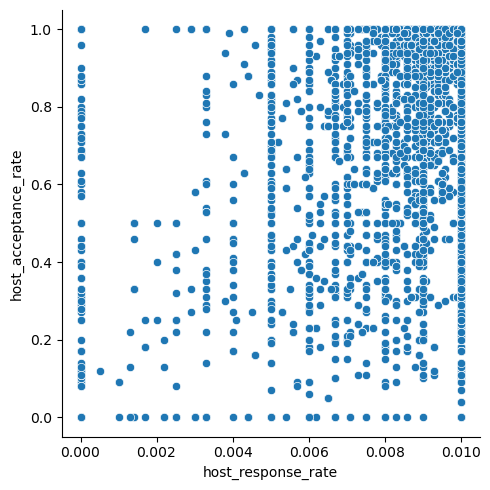

In [54]:
sns.relplot(x='host_response_rate', y='host_acceptance_rate', data=listings, kind='scatter')
plt.show();

**Encoding "host_is_superhost" and "host_identity_verified" values "T" and "F" to 1 and 0 respectively and creating separate column for binary variables.**

**Converting host_since, first_review, last_review and last_scraped to datetime.**

In [ ]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])

We examined the listings dataframe and found that the listing_id is unique (each row represents a unique listing), but host_id is repeated when one host has multiple listings. For example, the below view shows that host_id 2787 has five listings. There are a number of columns that are repeated for each row. For example, host_acceptance_rate is 0.91 for each of the 5 rows below. In order to specifically analyze host data and avoid repeated datapoints, we will remove duplicate host id's.

In [ ]:
listings[listings['host_id'] == 2787]

**Creating a new dataframe called "hosts" to store host information.**

In [57]:
column_name = ['host_id']
hosts = listings.sort_values('host_id').drop_duplicates(subset=column_name)

We can confirm there are now no duplicates because no row is returned below.


In [58]:
duplicates = hosts.duplicated(subset = column_name, keep = False)
hosts[duplicates].sort_values(by = column_name[0])

Empty DataFrame
Columns: [id, listing_url, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month, is_superhost_numeric]
Index: []

[0 rows x 62 columns]

We now create a new calculated column so that we can determine the average price of properties per host.

In [59]:
average_price_per_host = listings.groupby('host_id')['price'].mean()
average_price_per_host_df = pd.DataFrame(average_price_per_host)
average_price_per_host_df = average_price_per_host_df.reset_index()
average_price_per_host_df = average_price_per_host_df.rename(columns={"price": "average_host_price"})
average_price_per_host_df.head()

host_id  average_host_price
0     1678               153.0
1     2234               100.0
2     2571                99.0
3     2782               124.0
4     2787               153.5

And join this dataframe with "hosts" on host_id so that there are averages for each host in the "hosts" dataframe. We now have 25038 unique observations (hosts) in the "hosts" dataframe.

In [60]:
hosts = hosts.merge(average_price_per_host_df, on='host_id')
len(hosts.id.unique())

21919

**What is a superhost?**

A superhost is someone who provides exceptional service. On Airbnb, these hosts can be identified with a badge. A full description of a superhost can be found [here](https://www.airbnb.com/help/article/828/what-is-a-superhost). Since superhosts provide an extra level of service, we thought it would be interesting to subset the data by this feature for analysis.

**How many superhosts are there?**

There are 5363 superhosts and 19665 non-superhosts.

In [61]:
hosts['is_superhost_numeric'].value_counts()

f    16759
t     5160
Name: is_superhost_numeric, dtype: Int64

About 21.42% of all the hosts are superhosts.

In [62]:
5363/25038

0.2141944244747983

**How many hosts completed identity verification?**

19608 hosts have verified their identification and 5420 hosts have not.

**Creating two new dataframes, segmenting superhosts and non-superhosts.**

In [65]:
is_super_df = hosts[hosts.is_superhost_numeric == 1.0]
not_super_df = hosts[hosts.is_superhost_numeric == 0.0]

**Are there any listing with an unusual price?**

There are 19 listings (7.59% of all the listings) priced above $3000. We will analyze these outliers further below in our notebook and look at the links of each listing to cross-check the legitimacy of these listings.

In [66]:
hosts[hosts['price'] > 3000]['price'].count() / hosts['price'].count() * 100

0.11405629818878597

**How many of these outliers are owned by superhosts?**

2 of these listings are owned by superhosts and 17 of them are owned by non-superhosts.

In [67]:
is_super_df[is_super_df.price > 3000]['host_id'].count()

0

In [68]:
not_super_df[not_super_df.price > 3000]['host_id'].count()

0

## Calendar DataFrame

**Reading in and cleaning the calendar dataframes from March and July 2020**

In order to examine the impact of COVID-19 on Airbnb listing prices, we had read in the "calendar_2020_1" dataframe, which contains the price for each listing on each day in 2020. We also brought in two additional dataframes, "calendar_2020_3" and "calendar_2020_7", which contain the price for each listing from March to December 2020 and from July to December 2020. We can tell the impact of COVID-19 on prices by looking at the difference in the daily price between these three dataframes. This also provides us with insights into the hosts' attitude towards COVID-19.

In [69]:
calendar_2020_3 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/calendar.csv.gz")
calendar_2020_7 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/calendar.csv.gz")

In [70]:
# Convert the price and date columns to the appropriate format and data type
calendar_2020_1["price"]=calendar_2020_1["price"].str.replace("$","")
calendar_2020_1["price"]=calendar_2020_1["price"].str.replace(",","")
calendar_2020_1["price"]=calendar_2020_1["price"].astype("float")
calendar_2020_1['date'] = pd.to_datetime(calendar_2020_1['date'])

calendar_2020_3["price"]=calendar_2020_3["price"].str.replace("$","")
calendar_2020_3["price"]=calendar_2020_3["price"].str.replace(",","")
calendar_2020_3["price"]=calendar_2020_3["price"].astype("float")
calendar_2020_3['date'] = pd.to_datetime(calendar_2020_3['date'])

calendar_2020_7["price"]=calendar_2020_7["price"].str.replace("$","")
calendar_2020_7["price"]=calendar_2020_7["price"].str.replace(",","")
calendar_2020_7["price"]=calendar_2020_7["price"].astype("float")
calendar_2020_7['date'] = pd.to_datetime(calendar_2020_7['date'])

/var/folders/mq/sl3409bs05937klcjgg0zwr80000gn/T/ipykernel_2278/4251517622.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_2020_1["price"]=calendar_2020_1["price"].str.replace("$","")
/var/folders/mq/sl3409bs05937klcjgg0zwr80000gn/T/ipykernel_2278/4251517622.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_2020_3["price"]=calendar_2020_3["price"].str.replace("$","")
/var/folders/mq/sl3409bs05937klcjgg0zwr80000gn/T/ipykernel_2278/4251517622.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cale

In [71]:
# Semi-join with is_super_df to get the price of superhosts' listings in January, March, and July 2020
calendar_2020_1_super = calendar_2020_1[calendar_2020_1["listing_id"].isin(is_super_df["id"])]
calendar_2020_1_ts = calendar_2020_1_super.groupby("date").agg({"price":"mean"}).reset_index()

calendar_2020_3_super = calendar_2020_3[calendar_2020_3["listing_id"].isin(is_super_df["id"])]
calendar_2020_3_ts = calendar_2020_3_super.groupby("date").agg({"price":"mean"}).reset_index()

calendar_2020_7_super = calendar_2020_7[calendar_2020_7["listing_id"].isin(is_super_df["id"])]
calendar_2020_7_ts = calendar_2020_7_super.groupby("date").agg({"price":"mean"}).reset_index()

In [72]:
# Create 3 dataframes for January, March, and July 2020
calendar_2020_1_f = calendar_2020_1_ts.set_index("date").loc[:"2020-12-31",].reset_index()
calendar_2020_3_f = calendar_2020_3_ts.set_index("date").loc[:"2020-12-31",].reset_index()
calendar_2020_7_f = calendar_2020_7_ts.set_index("date").loc[:"2020-12-31",].reset_index()

**Reading in and cleaning the calendar dataframes from January, March, and July 2019**

To further examine the effect of COVID-19, we decided to bring in archived dataframes from 2019.

In [74]:
calendar_2019 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/calendar.csv.gz")
calendar_2019_3 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/calendar.csv.gz")
calendar_2019_7 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/calendar.csv.gz")

In [75]:
# Convert the price and date columns to the appropriate format and data type
calendar_2019["price"]=calendar_2019["price"].str.replace("$","")
calendar_2019["price"]=calendar_2019["price"].str.replace(",","")
calendar_2019["price"]=calendar_2019["price"].astype("float")
calendar_2019['date'] = pd.to_datetime(calendar_2019['date'])

calendar_2019_3["price"]=calendar_2019_3["price"].str.replace("$","")
calendar_2019_3["price"]=calendar_2019_3["price"].str.replace(",","")
calendar_2019_3["price"]=calendar_2019_3["price"].astype("float")
calendar_2019_3['date'] = pd.to_datetime(calendar_2019_3['date'])

calendar_2019_7["price"]=calendar_2019_7["price"].str.replace("$","")
calendar_2019_7["price"]=calendar_2019_7["price"].str.replace(",","")
calendar_2019_7["price"]=calendar_2019_7["price"].astype("float")
calendar_2019_7['date'] = pd.to_datetime(calendar_2019_7['date'])

/var/folders/mq/sl3409bs05937klcjgg0zwr80000gn/T/ipykernel_2278/808898978.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_2019["price"]=calendar_2019["price"].str.replace("$","")
/var/folders/mq/sl3409bs05937klcjgg0zwr80000gn/T/ipykernel_2278/808898978.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_2019_3["price"]=calendar_2019_3["price"].str.replace("$","")
/var/folders/mq/sl3409bs05937klcjgg0zwr80000gn/T/ipykernel_2278/808898978.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_20

In [76]:
# Semi-join with is_super_df to get the price of superhosts' listings in 2019
calendar_2019_super = calendar_2019[calendar_2019["listing_id"].isin(is_super_df["id"])]
calendar_2019_not_super = calendar_2019[calendar_2019["listing_id"].isin(not_super_df["id"])]

In [77]:
# Keep only the data before December 31, 2019
calendar_2019 = calendar_2019.set_index("date").loc[:"2019-12-31",].reset_index()

In [78]:
# Get the price of superhosts' listings in 2019
calendar_2019_super = calendar_2019[calendar_2019["listing_id"].isin(is_super_df["id"])]
calendar_2019_not_super = calendar_2019[calendar_2019["listing_id"].isin(not_super_df["id"])]

calendar_2019_3 = calendar_2019_3[calendar_2019_3["listing_id"].isin(is_super_df["id"])]
calendar_2019_3_ts = calendar_2019_3.groupby("date").agg({"price":"mean"}).reset_index()

calendar_2019_7 = calendar_2019_7[calendar_2019_7["listing_id"].isin(is_super_df["id"])]
calendar_2019_7_ts = calendar_2019_7.groupby("date").agg({"price":"mean"}).reset_index()

In [79]:
# Calculate the mean price to see the general trend
calendar_2019_super_ts = calendar_2019_super.groupby("date").agg({"price":"mean"}).reset_index()
calendar_2019_not_super_ts =calendar_2019_not_super.groupby("date").agg({"price":"mean"}).reset_index()

calendar_2019_3_f = calendar_2019_3_ts.set_index("date").loc[:"2019-12-31",].reset_index()
calendar_2019_7_f = calendar_2019_7_ts.set_index("date").loc[:"2019-12-31",].reset_index()

## Reviews DataFrame

In [80]:
# Drop any missing comment or any comment that has less than 3 characters
reviews.dropna(subset=['comments'], inplace=True)
reviews = reviews.loc[reviews['comments'].str.len()>3]

In [81]:
# Create two columns that indicate the year and month where a comment was posted
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month
reviews.head(1)

listing_id     id       date  reviewer_id reviewer_name  \
0        2595  17857 2009-11-21        50679          Jean   

                                            comments  year  month  
0  Notre séjour de trois nuits.\r<br/>Nous avons ...  2009     11

## Neighborhoods DataFrame

**Are the boroughs the same in "listings" and "neighborhoods" dataframes?**

Yes.

In [82]:
print(np.sort(listings.neighbourhood_group_cleansed.unique()))
print(np.sort(neighborhoods.neighbourhood_group.unique()))

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


**How many unique neighborhoods are in the "listings" dataframe?**

There are 218 neighborhoods in the "listings" dataframe while there are 230 neighborhoods in total in New York City.

In [83]:
print(len(listings['neighbourhood_cleansed'].unique()))
print(len(neighborhoods['neighbourhood'].unique()))

221
230


**Is there any neighborhood in the "listings" dataframe not in the "neighborhoods" dataframe?**

No, all the neighborhoods appeared in the listings dataframe are included in the broader neighborhoods dataframe.

In [84]:
# The neighourhood in the listings are included in the neighbourhoods form, so we don't need to join these two forms together
listings.loc[listings['neighbourhood_cleansed'].isin(neighborhoods['neighbourhood'])==False]

Empty DataFrame
Columns: [id, listing_url, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month, is_superhost_numeric]
Index: []

[0 rows x 62 columns]

# Exploratoy Data Analysis

## Listings DataFrame

**Visualizing the distribution of features in the listings dataframe.**

The latitude is normally distributed while the others appear to be skewed.

In [85]:
# Visualizing the distribution for every "feature"
df_new = listings[[
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable']]

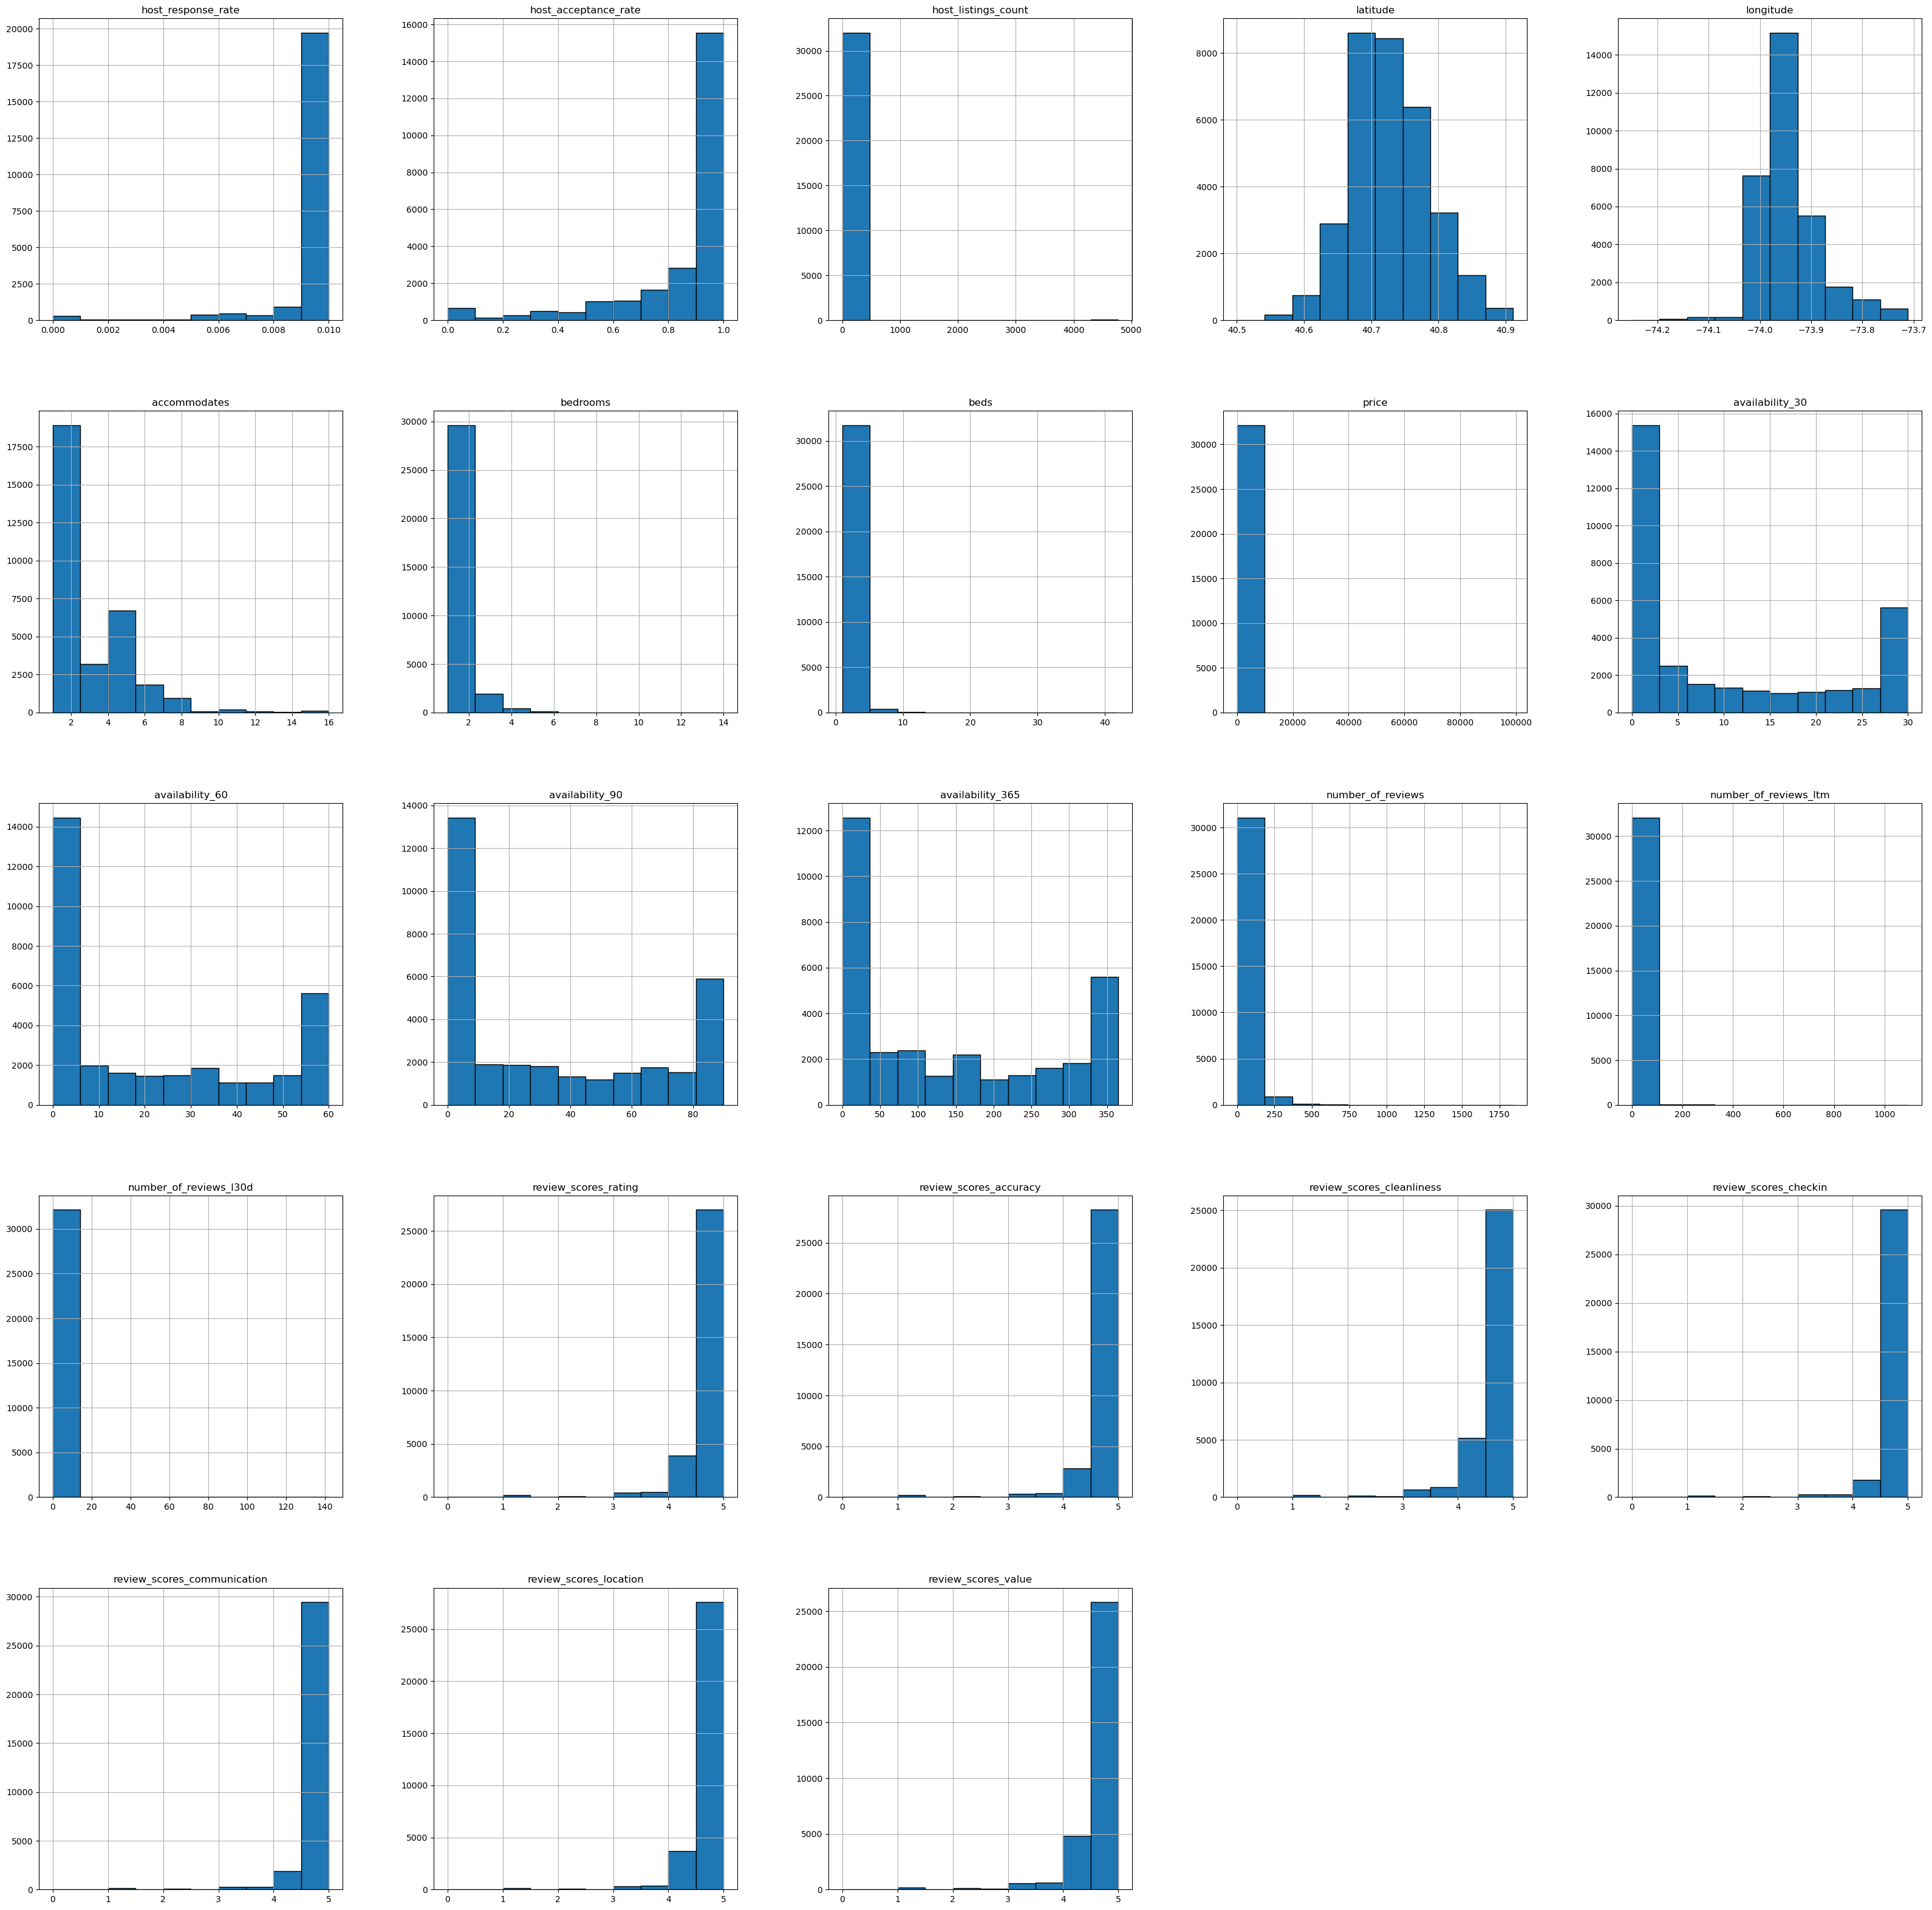

In [86]:
df_new.hist(edgecolor="black", linewidth=1, figsize=(40, 40));

In [87]:
# Create two dataframes that break down the listing data by superhost
superhost_listings = listings[listings.host_is_superhost == 't']
not_superhost_listings = listings[listings.host_is_superhost == 'f']

**What is the distribution of prices for superhosts and non-superhosts?**

On average, prices are lower for superhosts. However, we can see that there are a number of outliers, including some listings that are asking $10,000. We investigated a few of these listings to see if they look legitimate.

For example, we found [this listing](https://www.airbnb.com/rooms/13925864?source_impression_id=p3_1605909390_2yUmtCxB2UFi2CK2) which has no pictures of the actual room (2 bedrooms for $10,000/night in Queens). We decided to filter out more expensive listings in order to produce more insightful visualizations.

We can see that there are only 15 listings that are over $1000, which is only 0.3% of the dataset.

For these reasons, we are from this point forward looking at listings that are less than $1000 so that the visualizations are not highly skewed.

In [88]:
len(listings[listings.price > 1000]) / len(listings)

0.006839732628633608

In [89]:
# Examine listings with very high prices
listings[listings.id == 13925864]

id                            listing_url last_scraped  \
13362  13925864  https://www.airbnb.com/rooms/13925864   2023-03-06   

                source          name  \
13362  previous scrape  Puerto Plata   

                                             description  \
13362  Puerto Plata<br /><br /><b>The space</b><br />...   

      neighborhood_overview  \
13362           Muy hermosa   

                                             picture_url   host_id  \
13362  https://a0.muscache.com/pictures/miso/Hosting-...  58480311   

                                         host_url  ...  \
13362  https://www.airbnb.com/users/show/58480311  ...   

      review_scores_communication review_scores_location review_scores_value  \
13362                        4.46                   4.46                4.25   

      instant_bookable calculated_host_listings_count  \
13362                f                            1.0   

       calculated_host_listings_count_entire_homes  \
13362                                          1.0   

       calculated_host_listings_count_private_rooms  \
13362                                           0.0   

      calculated_host_listings_count_shared_rooms reviews_per_month  \
13362                                         0.0              0.35   

      is_superhost_numeric  
13362                    f  

[1 rows x 62 columns]

In [90]:
# Analyze the distribution of average listing price by superhost
no_na_listings = listings.dropna(subset= ['is_superhost_numeric'])
fig2 = px.strip(no_na_listings, y='price', x='is_superhost_numeric')
fig2.show()

**What is the distribution of listing prices by borough and host type?**

We can see that on average, there are more higher price listings in Manhattan compared to Queens and the Bronx which have larger distributions at lower prices.

Also, superhosts tend to have lower prices on average and much less outliers. For superhosts, the average price is the highest for Manhattan.

Text(0.5, 0, 'NYC Borough')

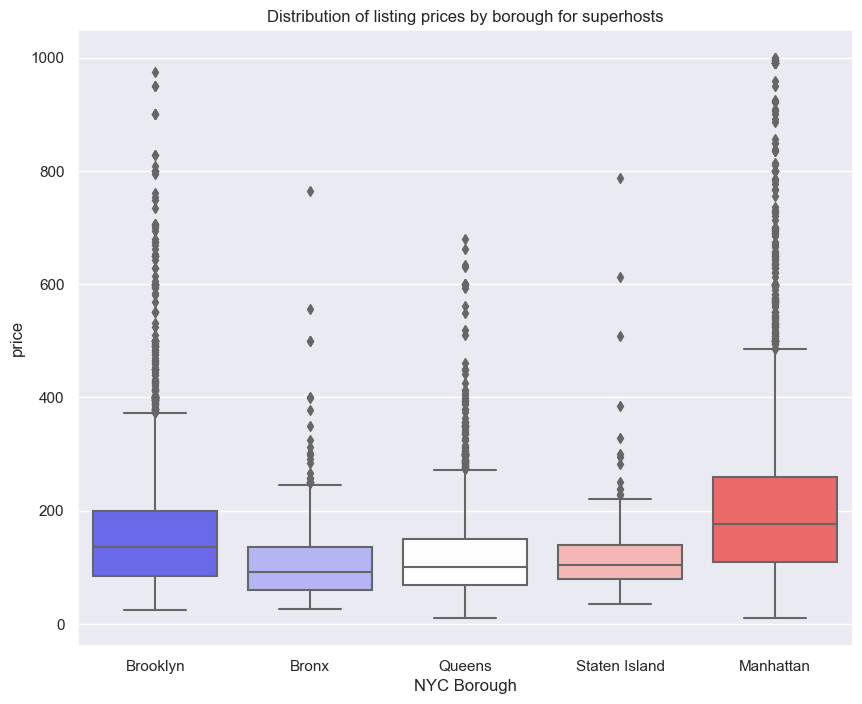

In [91]:
sns.set(rc={'figure.figsize':(10,8)})
sub2=superhost_listings[superhost_listings.price < 1000]
vis1=sns.boxplot(x='neighbourhood_group_cleansed', y='price',data=sub2,palette='bwr')
vis1.set_title('Distribution of listing prices by borough for superhosts')
vis1.set_xlabel('NYC Borough')

Text(0.5, 0, 'NYC Borough')

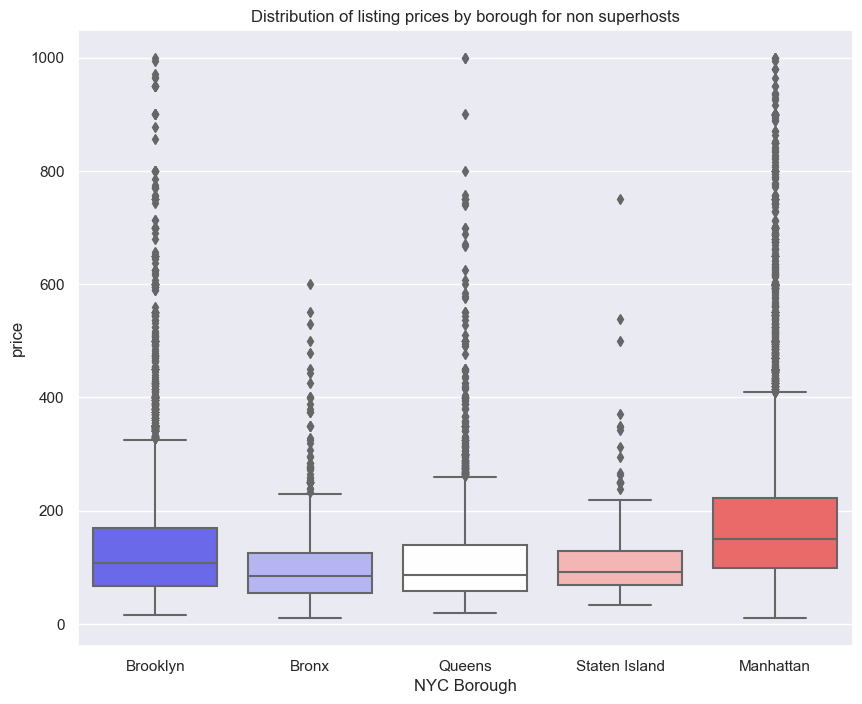

In [92]:
sns.set(rc={'figure.figsize':(10,8)})
sub2=not_superhost_listings[not_superhost_listings.price < 1000]
vis1=sns.boxplot(x='neighbourhood_group_cleansed', y='price',data=sub2,palette='bwr')
vis1.set_title('Distribution of listing prices by borough for non superhosts')
vis1.set_xlabel('NYC Borough')

**What is the distribution of room tpyes in the dataset?**

The most prolific room type is an entire home/apartment, and the least prolific appears to be the hotel room.

We observe a similar trend for both graphs above where both superhosts and non-superhosts have more number of listings that are entire homes and private rooms, as compared to shared rooms and hotel rooms (close to 0 for both superhosts and non-superhosts). A critical observation is that non-superhosts have 68% more listings that are entire homes/apartments than superhosts, and 75% more listings that are private rooms.

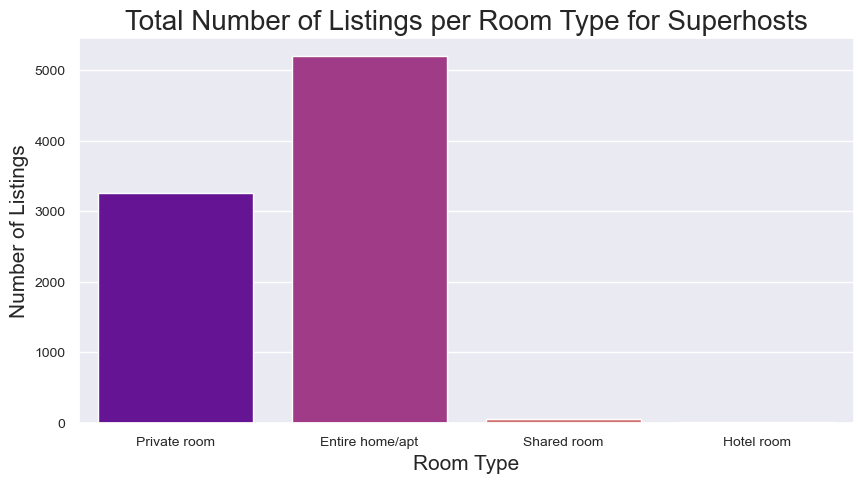

In [93]:
superhost_df = listings[listings.host_is_superhost == 't']
sns.countplot(data = superhost_df, x = 'room_type', palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title('Total Number of Listings per Room Type for Superhosts',fontsize = 20)
plt.xlabel('Room Type',fontsize = 15)
plt.ylabel('Number of Listings',fontsize = 15)
plt.tick_params(labelsize=10)
plt.show();

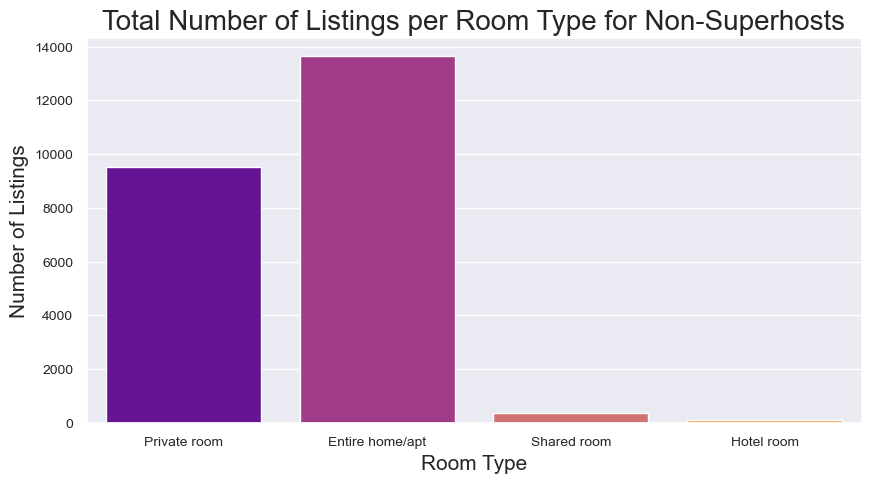

In [94]:
not_superhost_df = listings[listings.host_is_superhost == 'f']
sns.countplot(data = not_superhost_df, x = 'room_type', palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)

plt.title('Total Number of Listings per Room Type for Non-Superhosts',fontsize = 20)
plt.xlabel('Room Type',fontsize = 15)
plt.ylabel('Number of Listings',fontsize = 15)
plt.tick_params(labelsize=10)
plt.show()

**How many listings are there in each borough by room type?**

Hosts either offer their entire home or apartment, private room within their apartment, or a shared space in their room to potential Airbnb guests.
In New York, majority of the hosts offer their entire apartment/home to guests, followed by a private room within their apartment for rent.
In Manhattan & Brooklyn, maximum number of listings offered are that of an entire/home or apartment.
Based on the above observation, we can deduce the nature of the Airbnb hosts by neighbourhood group. Hosts in Manhattan would be looking at the Airbnb listing more as a business opportunity, as they are renting out their entire apartment, viz-a-viz hosts in Queens, Staten Island and Bronx where they would be listing out private rooms as they would be looking to earn extra money/save rent on their own apartment.

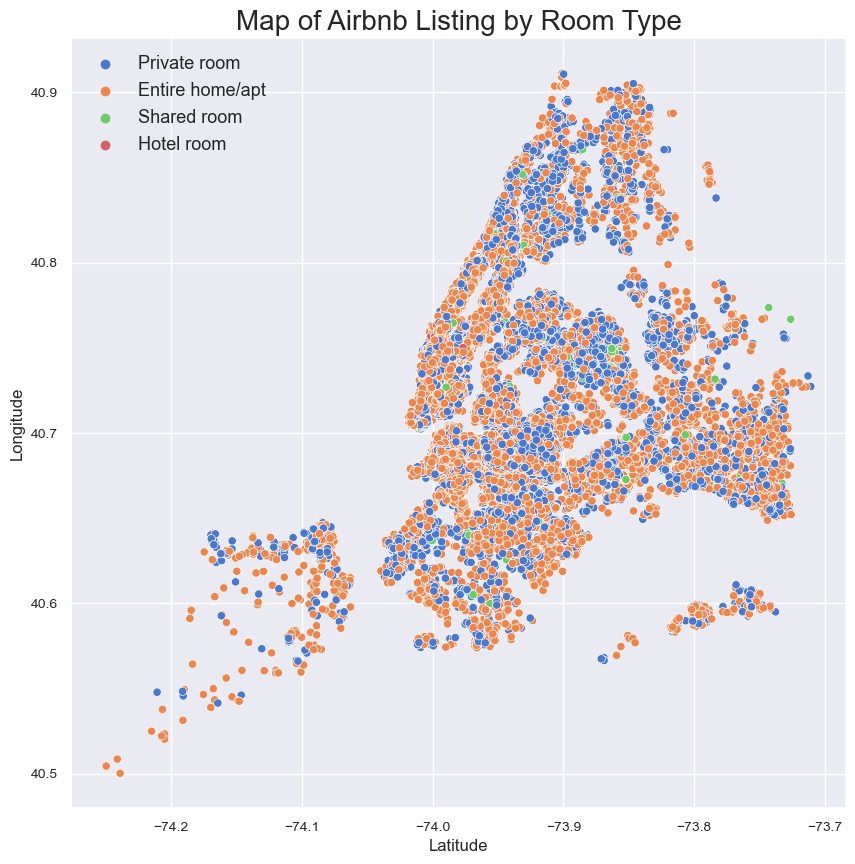

In [95]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=listings, x='longitude', y='latitude', hue='room_type', palette='muted')
plt.title('Map of Airbnb Listing by Room Type', fontsize=20)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel("Longitude",fontsize=12)
plt.legend(frameon=False, fontsize=13)
plt.tick_params(labelsize=10)

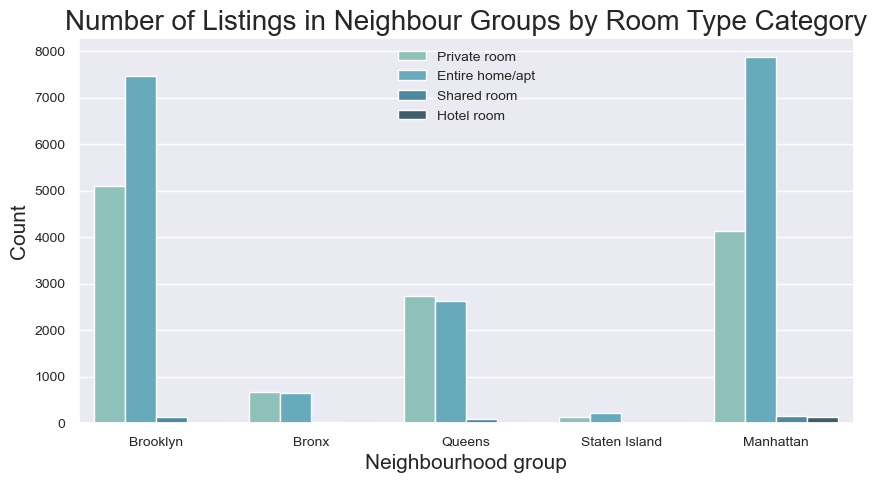

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(data=listings, x='neighbourhood_group_cleansed', hue='room_type', palette='GnBu_d')
plt.title('Number of Listings in Neighbour Groups by Room Type Category', fontsize=20)
plt.xlabel('Neighbourhood group',fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(frameon=False, fontsize=10)
plt.tick_params(labelsize=10)

**A density heatmap of listings in New York City.**

In [97]:
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(listings[['latitude','longitude']].dropna().values,radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
m

**Which neighbourhoods have the largest number of listings?**

"Shared room" and "hotel room" type Airbnb listings are barely available among 10 most listing-populated neighborhoods.
For these 10 neighborhoods only Manhattan and Brooklyn boroughs are represented. Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough and Harlem for Brooklyn.

In [98]:
# Find out the top 10 neighbourhoods that have the most listings in NYC boroughs
hot_neighborhoods = listings.neighbourhood_cleansed.value_counts().head(10)
hot_neighborhoods

Bedford-Stuyvesant    2386
Williamsburg          2027
Harlem                1620
Bushwick              1322
Midtown               1220
Hell's Kitchen        1082
Crown Heights         1063
Upper West Side       1035
Upper East Side       1033
East Village           871
Name: neighbourhood_cleansed, dtype: int64

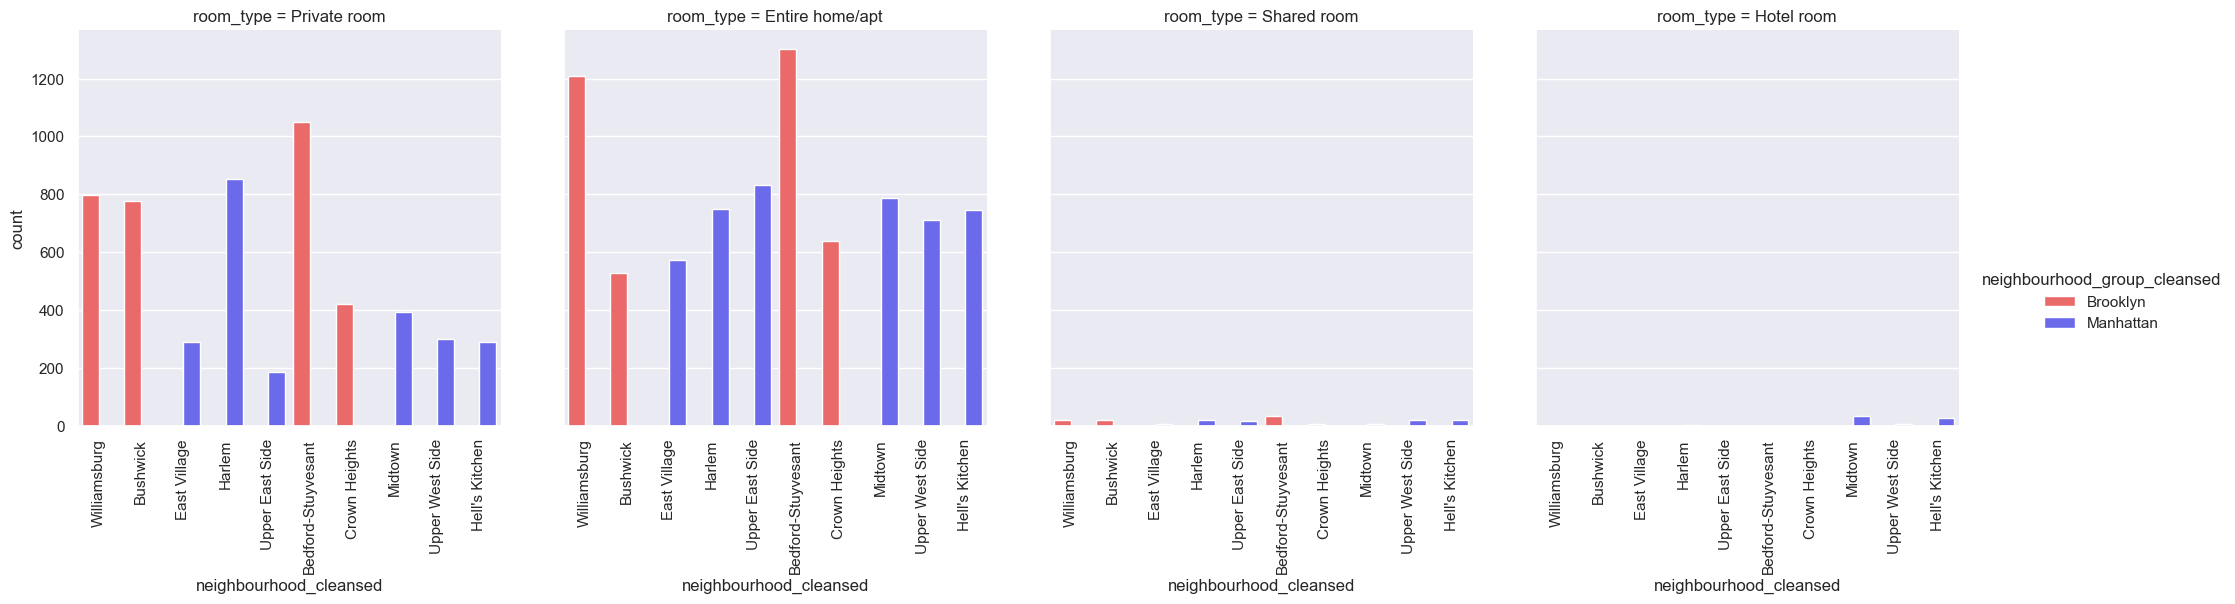

In [99]:
sub1 = listings.loc[listings['neighbourhood_cleansed'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Hell\'s Kitchen',
                 'Upper West Side','Upper East Side','East Village','Crown Heights','Midtown'])]
vis1 = sns.catplot(x='neighbourhood_cleansed', hue='neighbourhood_group_cleansed', col='room_type', data=sub1, kind='count',palette='seismic_r')
vis1.set_xticklabels(rotation=90)

The word clouds below display the most prolific words contained in listing descriptions in Manhattan and Brooklyn respectivly.

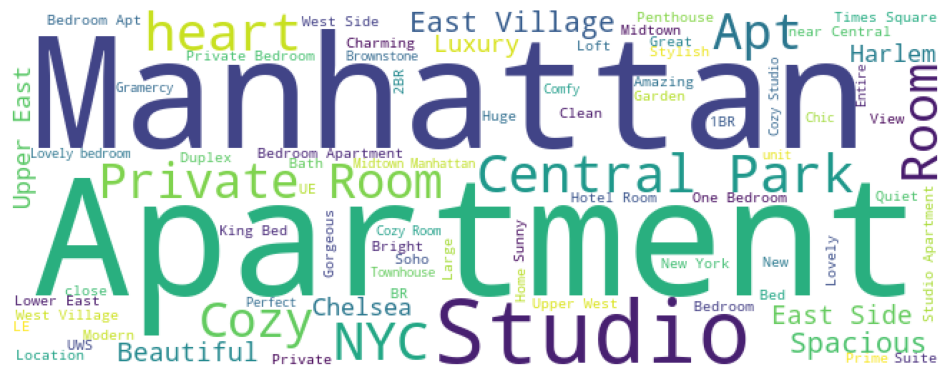

In [100]:
name_manhattan = " ".join(str(w) for w in listings.name[listings.neighbourhood_group_cleansed == "Manhattan"])
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='white',width=650,height=250,max_words=80).generate(name_manhattan)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name.png')
plt.show()

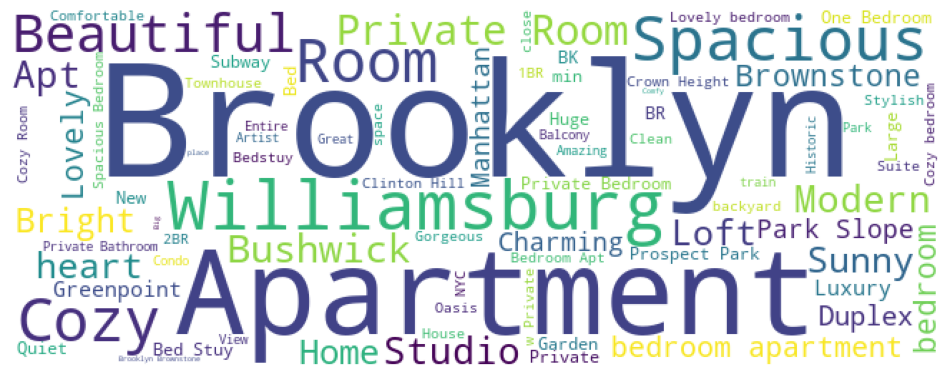

In [101]:
name_brooklyn = " ".join(str(w) for w in listings.name[listings.neighbourhood_group_cleansed == "Brooklyn"])
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='white',width=650,height=250,max_words=80).generate(name_brooklyn)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name.png')
plt.show()

The map below shows where the listings with more than 200 reviews are located.

In [102]:
number_of_reviews = listings[(listings.number_of_reviews >= 200)]
m_3 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=11)
# Add points to the map
mc = MarkerCluster()
for idx, row in number_of_reviews.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m_3.add_child(mc)
# Display the map
m_3

**What is the general availability of listings by superhost?**

The general trend observed across listings available across a span of 30, 60, 90 and 365 days is that more number of non-superhosts have their listings available for 30, 60, 90 and 360 days as compared to that of superhosts. We can also observe that superhosts generally don't keep their listings available for too long in the market.

In [103]:
# Remove values in availability columns equal to 0 so that they don't get displayed in visualizations
hosts_availability = hosts[(hosts['availability_30'] != 0) & (hosts['availability_60'] != 0) & (hosts['availability_90'] != 0) & (hosts['availability_365'] != 0)]

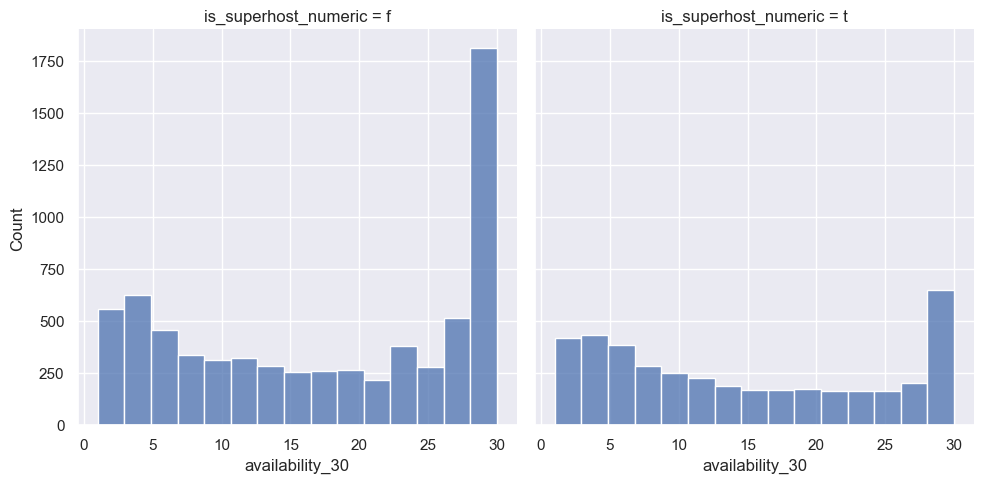

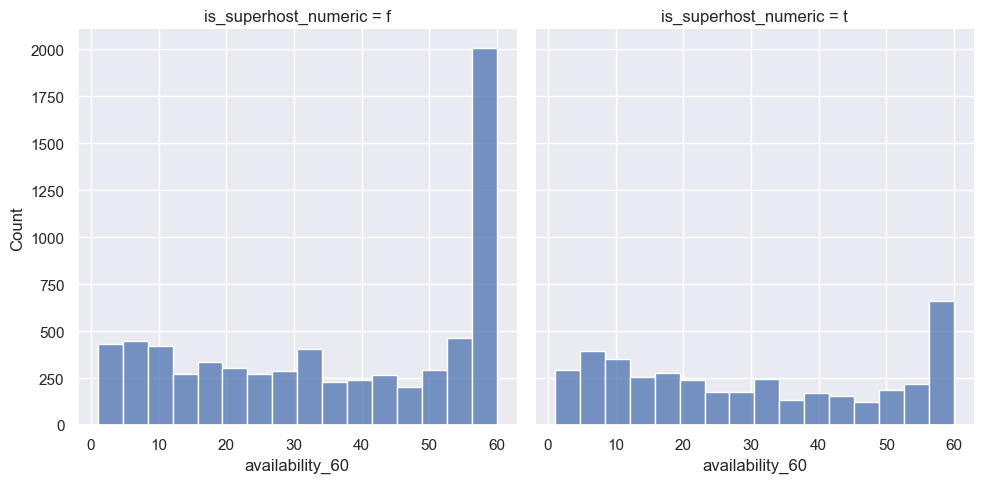

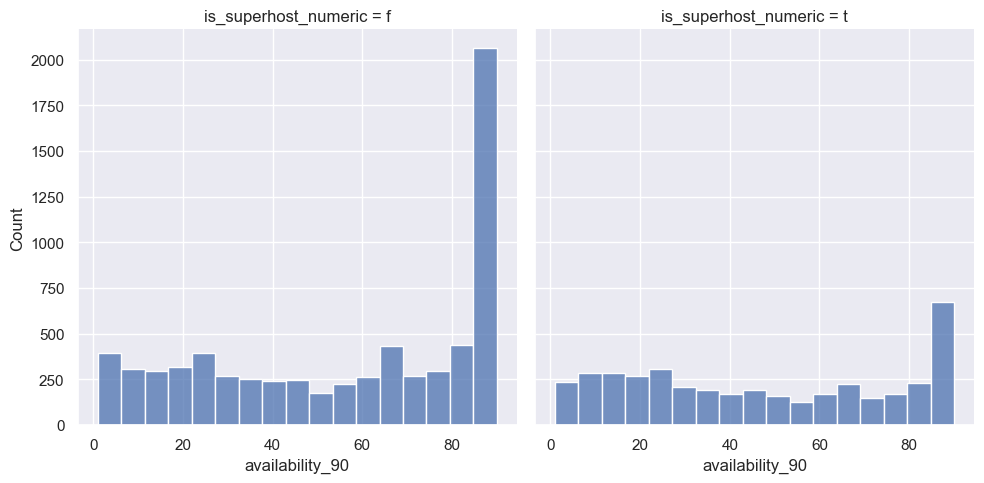

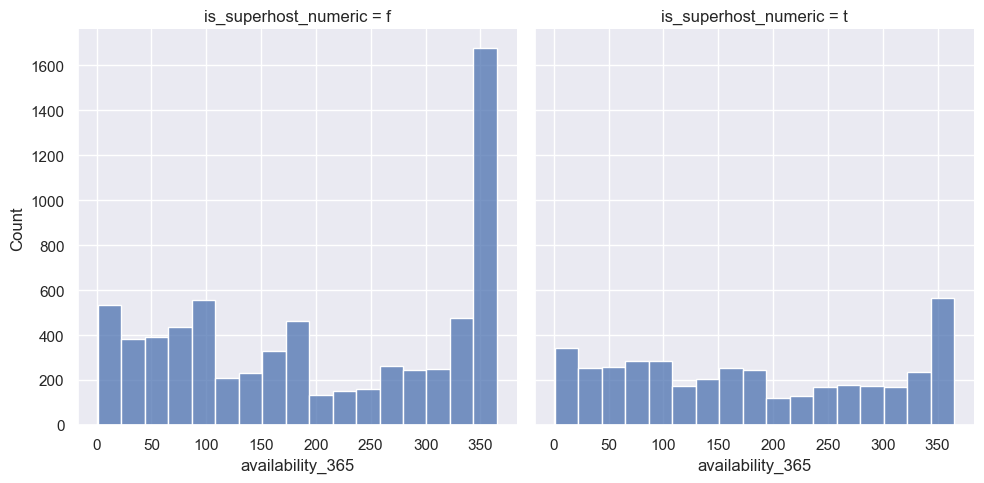

In [104]:
sns.displot(hosts_availability, x="availability_30", col="is_superhost_numeric", multiple="dodge")
sns.displot(hosts_availability, x="availability_60", col="is_superhost_numeric", multiple="dodge")
sns.displot(hosts_availability, x="availability_90", col="is_superhost_numeric", multiple="dodge")
sns.displot(hosts_availability, x="availability_365", col="is_superhost_numeric", multiple="dodge")

## Host Analysis

**How did the number of hosts on Airbnb change from 2009 to 2020?**

One of the features in the data is a date indicating when a host joined Airbnb. Below we create a new dataframe that calculates the cumualative number of hosts on Airbnb. These values are graphed on the line chart below to show how the number of hosts changes over time. We can see that starting in the early days of Airbnb, there was a slow increase in the number of hosts. By 2011 to 2012, this number started to increase greatly, and we can see some leveling off in 2020.

Every observation in our dataset has a recent date indicating when it was last scraped from the site. This means that all of the data in the graph below is from listings that were recently found to be active on Airbnb.

In [105]:
# Create a dataframe with a column for the cumulative number of hosts over time
num_host_by_date = hosts.groupby('host_since')[['host_id']].count().reset_index().rename(columns={'host_id': 'host_since_count'})
num_host_by_date['host_count_cum'] = num_host_by_date['host_since_count'].cumsum()
num_host_by_date.head()

host_since  host_since_count  host_count_cum
0  2008-08-11                 1               1
1  2008-08-18                 1               2
2  2008-08-27                 1               3
3  2008-09-07                 2               5
4  2008-09-09                 1               6

In order to create the bar graph below, we created dataframes with the number of hosts on the site resampled by the year. The bar graph is a breakdown of the total number of hosts, the number of regular hosts, and the number of superhosts for every year. Again, we can see a pretty steady increase across all of the years, and then a slow leveling off towards the end of the range.

In [113]:
sub5 = listings.host_id.value_counts().reset_index().head(5)
sub5.columns = ['host_id', 'count']
sub5 = sub5.merge(listings[['host_id','host_name','price', 'latitude','longitude']], left_on = 'host_id',right_on = 'host_id', how = 'left', copy = False)
fig = px.scatter_mapbox(sub5,lat="latitude",lon="longitude",color="host_name",size="price",size_max=30,opacity = .70,zoom=11)
fig.layout.mapbox.style = 'carto-positron'
fig.update_layout(title_text = 'Top 5 hosts and their hosted Locations<br>(Click legend to toggle hosts)', height = 800)
fig.show()

## Reviews Analysis

**How many reviews were there in each year?**

The number of comments posted increased over time and 2019 has the most comments posted. After COVID outbreak, the number of comments posted dropped. This is most likely the result of travel restrictions and the decrease in demand for rooms.

In [114]:
reviews.groupby('year')['comments'].count()

year
2009       113
2010       549
2011      2307
2012      4771
2013      9486
2014     18333
2015     35218
2016     60517
2017     85198
2018    125149
2019    170850
2020     71607
2021    161940
2022    315144
2023     44717
Name: comments, dtype: int64

Here is a visualization of this trend. We can see a drastic change in number between 2019 and 2020.

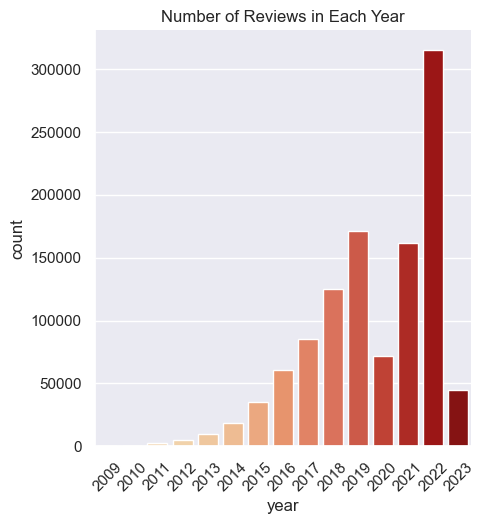

In [115]:
sns.catplot(x='year', data=reviews, kind='count', palette='OrRd')
plt.xticks(rotation=45)
plt.title("Number of Reviews in Each Year")
plt.show();

**How many comments were posted each month in 2019 and 2020?**

Below is a visualization of the distribution of the number of comments posted in 2019 and 2020. We can see that September, October and December usually have the most comments posted.

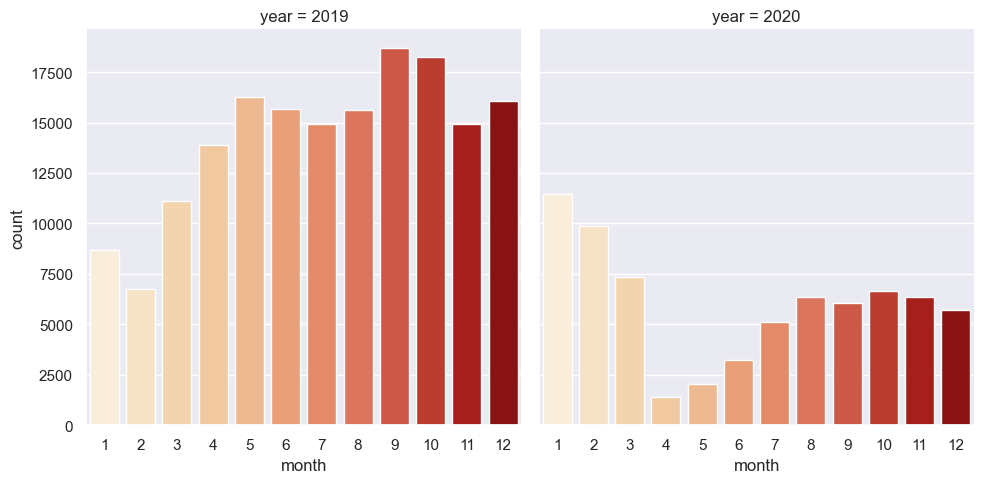

In [116]:
reviews_19_20 = reviews[(reviews['year']==2019) | (reviews['year']==2020)]
sns.catplot(x='month', data=reviews_19_20, kind='count', col='year', palette='OrRd')
plt.show();

**Who posted the most comments?**

Below are the five users that posted the most comments throughout the years. The top reviewer Elizabeth has posted 96 comments so far.

In [117]:
comments_count = reviews.groupby(['reviewer_id', 'reviewer_name'], as_index=True).agg({'comments':'count'}).sort_values(by='comments', ascending=False)
comments_count.head()

comments
reviewer_id reviewer_name          
63643121    Seth                 65
71164558    Linda                63
37722745    Linda                55
182446769   Renee                52
356658445   Shaniya              52

**A glimpse into what the top reviewers said.**

It appears that Elizabeth usually leaves positive comments.

<Figure size 1000x800 with 0 Axes>

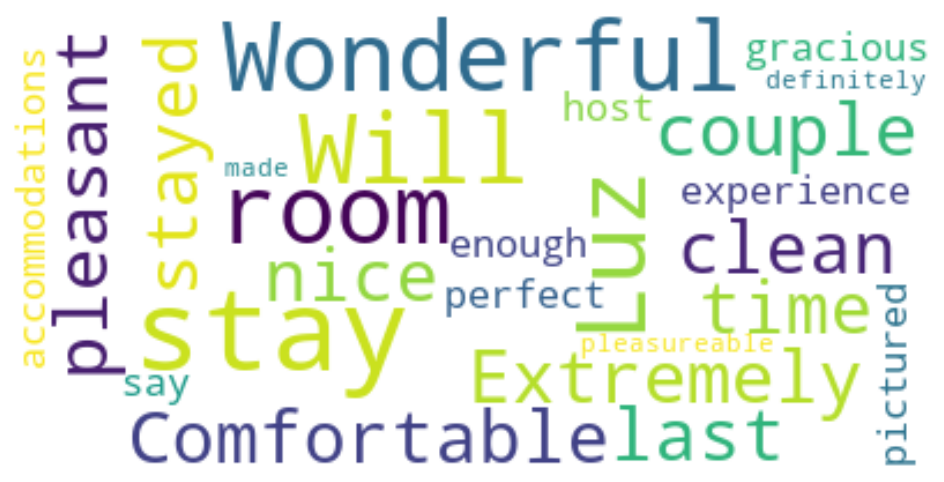

In [118]:
comments = reviews[reviews['reviewer_id']==111293458]['comments'].reset_index()

text = ""
for i in range(len(comments)):
    text = text + " " + str(comments['comments'][i])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

**Which listing received the most reviews?**

Below are the five listings that received the most comments throughout the years. Listing ID 32678719 has received 743 comments in total.


In [119]:
reviews.groupby('listing_id').agg({'comments': 'count'}).sort_values(by='comments', ascending=False).head()

comments
listing_id          
44799007        1825
37122502        1630
53843545        1085
37122162        1004
49439129         970

**A glimpse into the comments that the top listing received.**

It appears that this listing (presumably near Times Square) received more comments on its "great location", cleaniness, and other compliments.

In [121]:
lowest = listings.review_scores_rating.min()
worst_id = listings[listings.review_scores_rating==lowest]['id']
print(lowest)
print(len(worst_id))

0.0
4


**A glimpse into the comments on these listings.**

It appears that most comments these listings received were complaints against the hosts, reservations being cancelled, and the bathrooms.

<Figure size 1000x800 with 0 Axes>

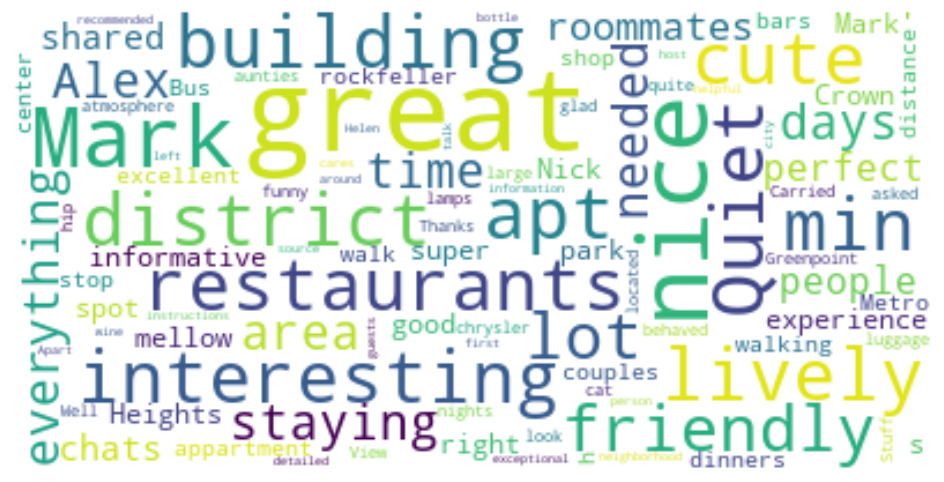

In [122]:
worst_review = reviews[reviews['listing_id'].isin(worst_id)]['comments'].reset_index()

text = ""
for i in range(len(worst_review)):
    text = text + " " + str(worst_review['comments'][i])

stopwords = set(STOPWORDS)
stopwords.add('Airbnb')
stopwords.add('place')
stopwords.add('said')
stopwords.add('really')
stopwords.add('us')
stopwords.add('even')
stopwords.add('told')
stopwords.add('one')
stopwords.add('apartment')
stopwords.add('hotel')
stopwords.add('room')
stopwords.add('day')
stopwords.add('stay')
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

## Pre- and Post-COVID Price Analysis

**How the average room price change in 2018 and 2019?**

* We can see that superhosts on average charge more than non-superhosts.
* The average room price on weekends is higher than the price on weekdays.
* We can also see that the average price increases gradually from January to July. Between July and December, the average price fluctuates in a relatively smaller range. The maximum average price appears at the end of the year.

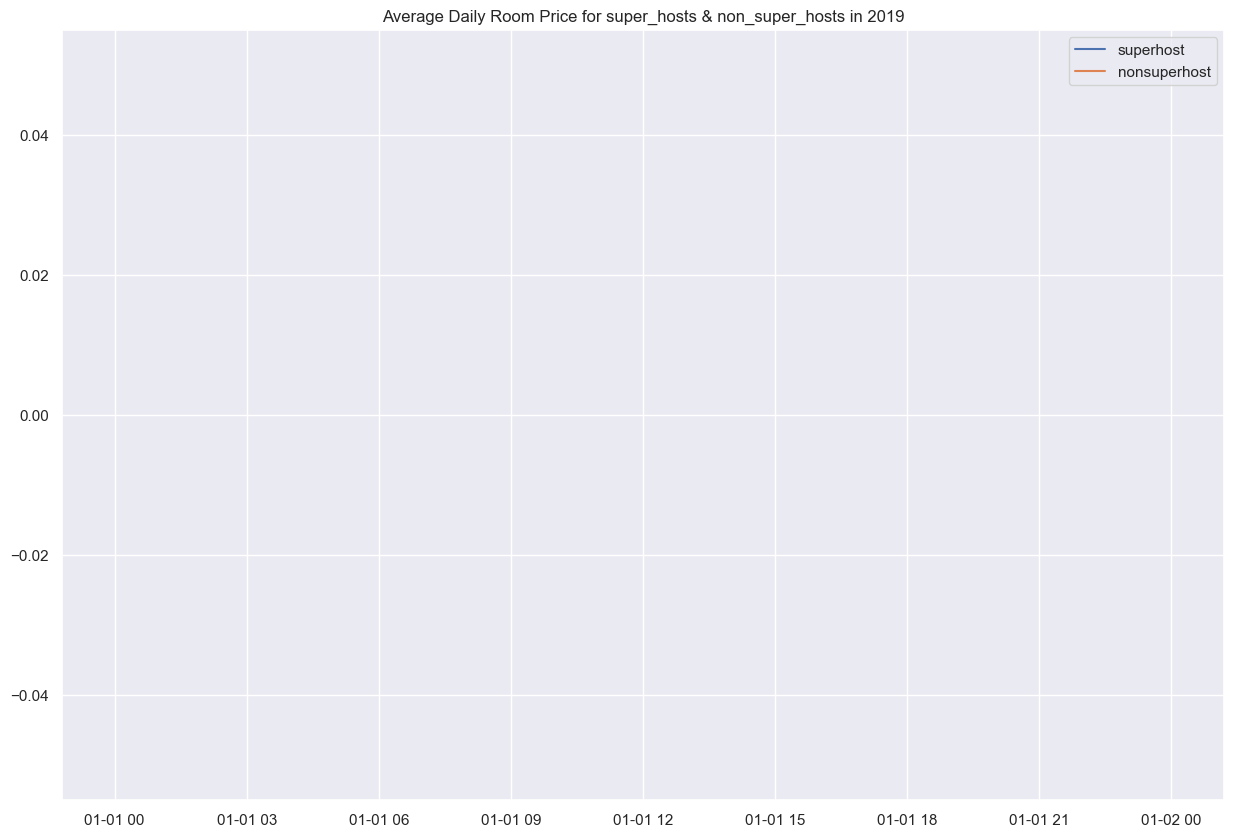

In [123]:
fig, axes = plt.subplots(figsize=(15,10))  
axes.plot(calendar_2019_super_ts["date"],calendar_2019_super_ts["price"],label="superhost")
axes.plot(calendar_2019_not_super_ts["date"],calendar_2019_not_super_ts["price"],label="nonsuperhost")
axes.set_title("Average Daily Room Price for super_hosts & non_super_hosts in 2019")
plt.legend()
plt.show()

**How did COVID-19 affect hosts' setting the price?**

* From the graph below we can see that in January, before COVID-19 hit the U.S., hosts' expectation about future prices was similar to the trend in 2019.
* When COVID-19 hit the U.S. in March, the actual prices in March were lower than what they expected in January. Prices increased a little in April, and were expected to go back to normal in May. 
* In July, the actual prices were again much lower than what was expected in January and March, and it seems like prices will go back to normal in December.

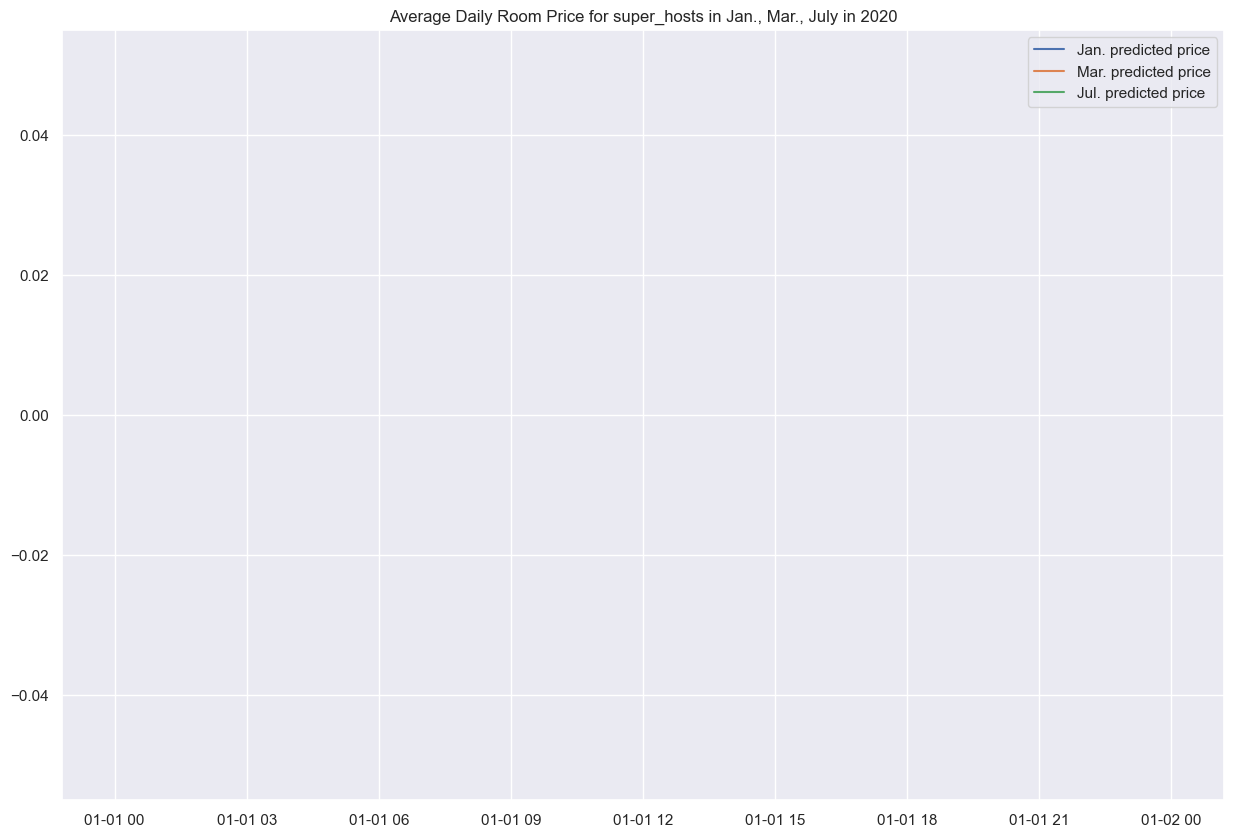

In [124]:
fig, axes = plt.subplots(figsize=(15,10))  
axes.plot(calendar_2020_1_f["date"],calendar_2020_1_f["price"],label="Jan. predicted price")
axes.plot(calendar_2020_3_f["date"],calendar_2020_3_f["price"],label="Mar. predicted price")
axes.plot(calendar_2020_7_f["date"],calendar_2020_7_f["price"],label="Jul. predicted price")
axes.set_title("Average Daily Room Price for super_hosts in Jan., Mar., July in 2020")
plt.legend()
plt.show()

**Did hosts' expectation about future prices follow the same trend in 2019?**
 
Unlike what we just saw in 2020, the actual prices in March and July 2019 were only a little different from what was expected in January 2019.

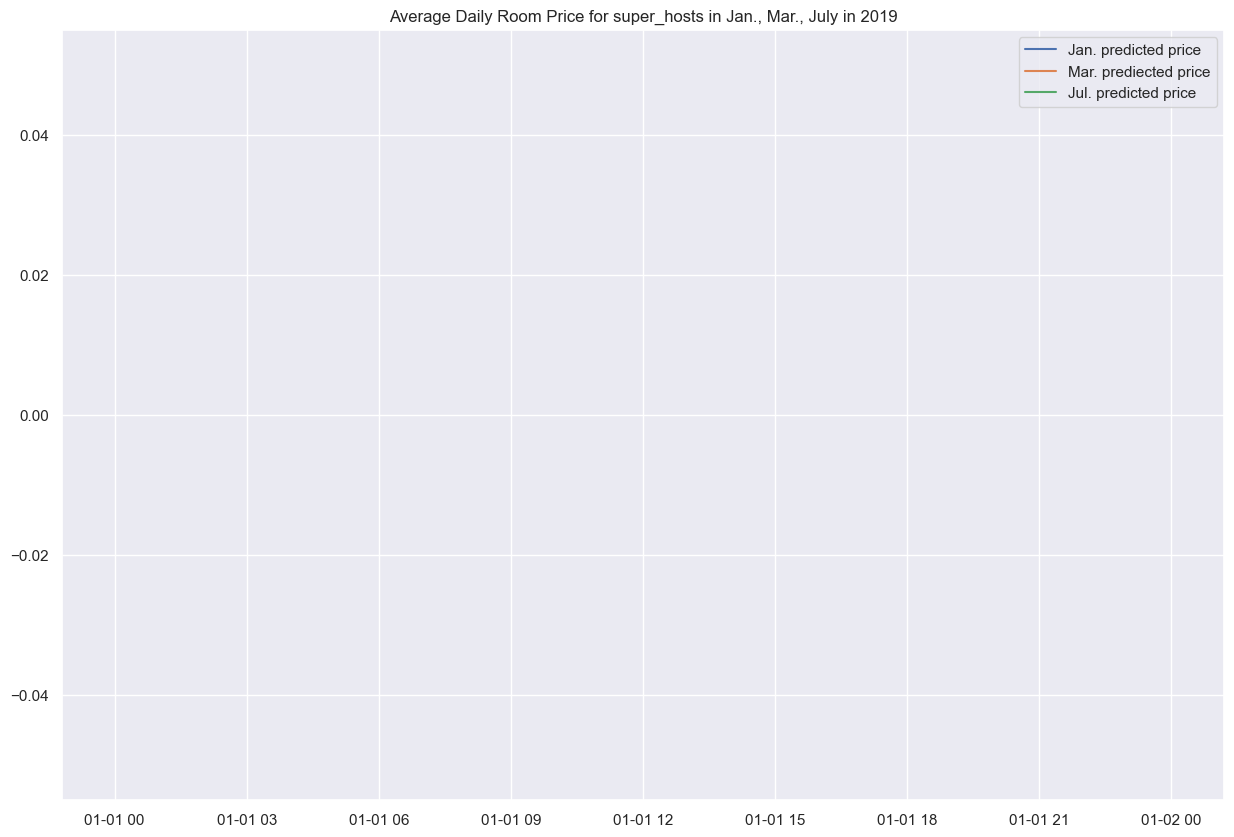

In [125]:
fig, axes = plt.subplots(figsize=(15,10))  
axes.plot(calendar_2019_super_ts["date"],calendar_2019_super_ts["price"],label="Jan. predicted price")
axes.plot(calendar_2019_3_f["date"],calendar_2019_3_f["price"],label="Mar. prediected price")
axes.plot(calendar_2019_7_f["date"],calendar_2019_7_f["price"],label="Jul. predicted price")
axes.set_title("Average Daily Room Price for super_hosts in Jan., Mar., July in 2019")
plt.legend()
plt.show()

# Machine Learning Models

## Classification Model


In this model, we will predict whether a host is a superhost based on the available features in the dataset.

In [126]:
# make a copy of the dataframe
model_df = listings.copy()

In [127]:
# fill any na values with 0
model_df.is_superhost_numeric = model_df.is_superhost_numeric.fillna(0)

In [188]:
model_cols = model_df.drop(columns=['id','listing_url','last_scraped','name','description','neighborhood_overview','picture_url','host_url','host_name','host_since','host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','neighbourhood','neighbourhood_cleansed','property_type','bathrooms_text','amenities','first_review','last_review','price','host_identity_verified','host_has_profile_pic','host_is_superhost','host_response_rate','host_acceptance_rate','host_listings_count',], axis=1)

df_listing_dummied = pd.get_dummies(model_cols, columns=['host_response_time','neighbourhood_group_cleansed','room_type','has_availability','instant_bookable'], drop_first=True)

In [189]:
# convert average_availability_30
average_availability_30_per_host = df_listing_dummied.groupby('host_id')['availability_30'].mean()
average_availability_30_per_host = pd.DataFrame(average_availability_30_per_host)
average_availability_30_per_host = average_availability_30_per_host.reset_index()
average_availability_30_per_host = average_availability_30_per_host.rename(columns={"availability_30": "average_availability_30_per_host"})

df_listing_dummied = df_listing_dummied.merge(average_availability_30_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='availability_30', axis=1)

In [190]:
# convert average_availability_60
average_availability_60_per_host = df_listing_dummied.groupby('host_id')['availability_60'].mean()
average_availability_60_per_host = pd.DataFrame(average_availability_60_per_host)
average_availability_60_per_host = average_availability_60_per_host.reset_index()
average_availability_60_per_host = average_availability_60_per_host.rename(columns={"availability_60": "average_availability_60_per_host"})

df_listing_dummied = df_listing_dummied.merge(average_availability_60_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='availability_60', axis=1)

In [191]:
# convert average_availability_90
average_availability_90_per_host = df_listing_dummied.groupby('host_id')['availability_90'].mean()
average_availability_90_per_host = pd.DataFrame(average_availability_90_per_host)
average_availability_90_per_host = average_availability_90_per_host.reset_index()
average_availability_90_per_host = average_availability_90_per_host.rename(columns={"availability_90": "average_availability_90_per_host"})

df_listing_dummied = df_listing_dummied.merge(average_availability_90_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='availability_90', axis=1)

In [192]:
# convert average_availability_365
average_availability_365_per_host = df_listing_dummied.groupby('host_id')['availability_365'].mean()
average_availability_365_per_host = pd.DataFrame(average_availability_365_per_host)
average_availability_365_per_host = average_availability_365_per_host.reset_index()
average_availability_365_per_host = average_availability_365_per_host.rename(columns={"availability_365": "average_availability_365_per_host"})

df_listing_dummied = df_listing_dummied.merge(average_availability_365_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='availability_365', axis=1)

In [193]:
# convert number of reviews
total_number_of_reviews_per_host = df_listing_dummied.groupby('host_id')['number_of_reviews'].sum()
total_number_of_reviews_per_host = pd.DataFrame(total_number_of_reviews_per_host)
total_number_of_reviews_per_host = total_number_of_reviews_per_host.reset_index()
total_number_of_reviews_per_host = total_number_of_reviews_per_host.rename(columns={"number_of_reviews": "total_number_of_reviews_per_host"})

df_listing_dummied = df_listing_dummied.merge(total_number_of_reviews_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='number_of_reviews', axis=1)

In [194]:
# convert number of reviews_ltm
total_number_of_reviews_ltm_per_host = df_listing_dummied.groupby('host_id')['number_of_reviews_ltm'].sum()
total_number_of_reviews_ltm_per_host = pd.DataFrame(total_number_of_reviews_ltm_per_host)
total_number_of_reviews_ltm_per_host = total_number_of_reviews_ltm_per_host.reset_index()
total_number_of_reviews_ltm_per_host = total_number_of_reviews_ltm_per_host.rename(columns={"number_of_reviews_ltm": "total_number_of_reviews_ltm_per_host"})

df_listing_dummied = df_listing_dummied.merge(total_number_of_reviews_ltm_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='number_of_reviews_ltm', axis=1)

In [195]:
# convert number_of_reviews_l30d 
total_number_of_reviews_l30d_per_host = df_listing_dummied.groupby('host_id')['number_of_reviews_l30d'].sum()
total_number_of_reviews_l30d_per_host = pd.DataFrame(total_number_of_reviews_l30d_per_host)
total_number_of_reviews_l30d_per_host = total_number_of_reviews_l30d_per_host.reset_index()
total_number_of_reviews_l30d_per_host = total_number_of_reviews_l30d_per_host.rename(columns={"number_of_reviews_l30d": "total_number_of_reviews_l30d_per_host"})

df_listing_dummied = df_listing_dummied.merge(total_number_of_reviews_l30d_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='number_of_reviews_l30d', axis=1)

In [196]:
# convert review_scores_rating
avg_review_scores_rating_per_host = df_listing_dummied.groupby('host_id')['review_scores_rating'].mean()
avg_review_scores_rating_per_host = pd.DataFrame(avg_review_scores_rating_per_host)
avg_review_scores_rating_per_host = avg_review_scores_rating_per_host.reset_index()
avg_review_scores_rating_per_host = avg_review_scores_rating_per_host.rename(columns={"review_scores_rating": "avg_review_scores_rating_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_rating_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_rating', axis=1)

In [197]:
# convert review_scores_accuracy
avg_review_scores_accuracy_per_host = df_listing_dummied.groupby('host_id')['review_scores_accuracy'].mean()
avg_review_scores_accuracy_per_host = pd.DataFrame(avg_review_scores_accuracy_per_host)
avg_review_scores_accuracy_per_host = avg_review_scores_accuracy_per_host.reset_index()
avg_review_scores_accuracy_per_host = avg_review_scores_accuracy_per_host.rename(columns={"review_scores_accuracy": "avg_review_scores_accuracy_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_accuracy_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_accuracy', axis=1)

In [198]:
# convert review_scores_cleanliness
avg_review_scores_cleanliness_per_host = df_listing_dummied.groupby('host_id')['review_scores_cleanliness'].mean()
avg_review_scores_cleanliness_per_host = pd.DataFrame(avg_review_scores_cleanliness_per_host)
avg_review_scores_cleanliness_per_host = avg_review_scores_cleanliness_per_host.reset_index()
avg_review_scores_cleanliness_per_host = avg_review_scores_cleanliness_per_host.rename(columns={"review_scores_cleanliness": "avg_review_scores_cleanliness_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_cleanliness_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_cleanliness', axis=1)

In [199]:
# convert review_scores_checkin
avg_review_scores_checkin_per_host = df_listing_dummied.groupby('host_id')['review_scores_checkin'].mean()
avg_review_scores_checkin_per_host = pd.DataFrame(avg_review_scores_checkin_per_host)
avg_review_scores_checkin_per_host = avg_review_scores_checkin_per_host.reset_index()
avg_review_scores_checkin_per_host = avg_review_scores_checkin_per_host.rename(columns={"review_scores_checkin": "avg_review_scores_checkin_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_checkin_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_checkin', axis=1)

In [200]:
# convert review_scores_communication
avg_review_scores_communication_per_host = df_listing_dummied.groupby('host_id')['review_scores_communication'].mean()
avg_review_scores_communication_per_host = pd.DataFrame(avg_review_scores_communication_per_host)
avg_review_scores_communication_per_host = avg_review_scores_communication_per_host.reset_index()
avg_review_scores_communication_per_host = avg_review_scores_communication_per_host.rename(columns={"review_scores_communication": "avg_review_scores_checkin_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_communication_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_communication', axis=1)

In [201]:
# convert review_scores_location
avg_review_scores_location_per_host = df_listing_dummied.groupby('host_id')['review_scores_location'].mean()
avg_review_scores_location_per_host = pd.DataFrame(avg_review_scores_location_per_host)
avg_review_scores_location_per_host = avg_review_scores_location_per_host.reset_index()
avg_review_scores_location_per_host = avg_review_scores_location_per_host.rename(columns={"review_scores_location": "avg_review_scores_location_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_location_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_location', axis=1)

In [202]:
# convert review_scores_value 
avg_review_scores_value_per_host = df_listing_dummied.groupby('host_id')['review_scores_value'].mean()
avg_review_scores_value_per_host = pd.DataFrame(avg_review_scores_value_per_host)
avg_review_scores_value_per_host = avg_review_scores_value_per_host.reset_index()
avg_review_scores_value_per_host = avg_review_scores_value_per_host.rename(columns={"review_scores_value": "avg_review_scores_value_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_value_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_value', axis=1)

In [203]:
# convert reviews_per_month
avg_reviews_per_month_per_host = df_listing_dummied.groupby('host_id')['reviews_per_month'].mean()
avg_reviews_per_month_per_host = pd.DataFrame(avg_reviews_per_month_per_host)
avg_reviews_per_month_per_host = avg_reviews_per_month_per_host.reset_index()
avg_reviews_per_month_per_host = avg_reviews_per_month_per_host.rename(columns={"reviews_per_month": "avg_reviews_per_month_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_reviews_per_month_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='reviews_per_month', axis=1)

In [204]:
# convert neighbourhood_group_cleansed_Brooklyn
avg_Brooklyn_per_host = df_listing_dummied.groupby('host_id')['neighbourhood_group_cleansed_Brooklyn'].mean()
avg_Brooklyn_per_host = pd.DataFrame(avg_Brooklyn_per_host)
avg_Brooklyn_per_host = avg_Brooklyn_per_host.reset_index()
avg_Brooklyn_per_host = avg_Brooklyn_per_host.rename(columns={"neighbourhood_group_cleansed_Brooklyn": "avg_Brooklyn_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_Brooklyn_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='neighbourhood_group_cleansed_Brooklyn', axis=1)

In [205]:
# convert neighbourhood_group_cleansed_Manhattan
avg_Manhattan_per_host = df_listing_dummied.groupby('host_id')['neighbourhood_group_cleansed_Manhattan'].mean()
avg_Manhattan_per_host = pd.DataFrame(avg_Manhattan_per_host)
avg_Manhattan_per_host = avg_Manhattan_per_host.reset_index()
avg_Manhattan_per_host = avg_Manhattan_per_host.rename(columns={"neighbourhood_group_cleansed_Manhattan": "avg_Brooklyn_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_Manhattan_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='neighbourhood_group_cleansed_Manhattan', axis=1)

In [206]:
# convert neighbourhood_group_cleansed_Queens
avg_Queens_per_host = df_listing_dummied.groupby('host_id')['neighbourhood_group_cleansed_Queens'].mean()
avg_Queens_per_host = pd.DataFrame(avg_Queens_per_host)
avg_Queens_per_host = avg_Queens_per_host.reset_index()
avg_Queens_per_host = avg_Queens_per_host.rename(columns={"neighbourhood_group_cleansed_Queens": "avg_Queens_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_Manhattan_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='neighbourhood_group_cleansed_Queens', axis=1)

In [207]:
# convert neighbourhood_group_cleansed_Staten Island
avg_Staten_Island_per_host = df_listing_dummied.groupby('host_id')['neighbourhood_group_cleansed_Staten Island'].mean()
avg_Staten_Island_per_host = pd.DataFrame(avg_Staten_Island_per_host)
avg_Staten_Island_per_host = avg_Staten_Island_per_host.reset_index()
avg_Staten_Island_per_host = avg_Staten_Island_per_host.rename(columns={"neighbourhood_group_cleansed_Staten Island": "avg_Staten_Island_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_Staten_Island_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='neighbourhood_group_cleansed_Staten Island', axis=1)

In [208]:
# convert room_type_Hotel room
avg_room_type_Hotel_room_per_host = df_listing_dummied.groupby('host_id')['room_type_Hotel room'].mean()
avg_room_type_Hotel_room_per_host = pd.DataFrame(avg_room_type_Hotel_room_per_host)
avg_room_type_Hotel_room_per_host = avg_room_type_Hotel_room_per_host.reset_index()
avg_room_type_Hotel_room_per_host = avg_room_type_Hotel_room_per_host.rename(columns={"room_type_Hotel room": "avg_room_type_Hotel_room_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_room_type_Hotel_room_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='room_type_Hotel room', axis=1)

In [209]:
# convert room_type_Private room
avg_room_type_Private_room_per_host = df_listing_dummied.groupby('host_id')['room_type_Private room'].mean()
avg_room_type_Private_room_per_host = pd.DataFrame(avg_room_type_Private_room_per_host)
avg_room_type_Private_room_per_host = avg_room_type_Private_room_per_host.reset_index()
avg_room_type_Private_room_per_host = avg_room_type_Private_room_per_host.rename(columns={"room_type_Private room": "avg_room_type_Private_room_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_room_type_Private_room_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='room_type_Private room', axis=1)

In [210]:
# convert room_type_Shared room
avg_room_type_Shared_room_per_host = df_listing_dummied.groupby('host_id')['room_type_Shared room'].mean()
avg_room_type_Shared_room_per_host = pd.DataFrame(avg_room_type_Shared_room_per_host)
avg_room_type_Shared_room_per_host = avg_room_type_Shared_room_per_host.reset_index()
avg_room_type_Shared_room_per_host = avg_room_type_Shared_room_per_host.rename(columns={"room_type_Shared room": "avg_room_type_Shared_room_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_room_type_Shared_room_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='room_type_Shared room', axis=1)

In [211]:
# convert instant_bookable_t
avg_instant_bookable_t_per_host = df_listing_dummied.groupby('host_id')['instant_bookable_t'].mean()
avg_instant_bookable_t_per_host = pd.DataFrame(avg_instant_bookable_t_per_host)
avg_instant_bookable_t_per_host = avg_instant_bookable_t_per_host.reset_index()
avg_instant_bookable_t_per_host = avg_instant_bookable_t_per_host.rename(columns={"instant_bookable_t": "avg_instant_bookable_t_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_instant_bookable_t_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='instant_bookable_t', axis=1)

In [212]:
# convert from object type to category to prepare for model creation
df_listing_dummied.is_superhost_numeric = df_listing_dummied.is_superhost_numeric.astype('category')

In [213]:
# eliminate duplicate host_id
column_name = ['host_id']
hosts_model_df = df_listing_dummied.sort_values('host_id').drop_duplicates(subset=column_name)

In [220]:
# features matrix
X = hosts_model_df.drop('is_superhost_numeric', axis=1)  
# target vector
y = hosts_model_df['is_superhost_numeric']

# split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

---

### Building KNN Model Using Top Features Only

In [227]:
# subset the df for only the most important features
model_2_df = hosts_model_df[['is_superhost_numeric','total_number_of_reviews_ltm_per_host','avg_reviews_per_month_per_host','total_number_of_reviews_per_host','avg_review_scores_rating_per_host', 'host_response_time_within an hour','avg_review_scores_cleanliness_per_host','avg_review_scores_accuracy_per_host']]

In [228]:
# features matrix
X = model_2_df.drop('is_superhost_numeric', axis=1)  
# target vector
y = model_2_df['is_superhost_numeric']

# split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

In [231]:
# overall accuracy score
accuracy_score(ytest, y_model)

0.8015510948905109

## Regression Model



In [236]:
data.beds = data.beds.astype('float32')
data.bedrooms = data.bedrooms.astype('float32')

In [238]:
# one hot encoding for categorical variables
categorical_col = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        print("===============================================================================")
        print(f"{column} : {data[column].unique()}")
        categorical_col.append(column)
        
dataset = pd.get_dummies(data, columns=['neighbourhood_group_cleansed','room_type', 'instant_bookable'], drop_first=True)

# declaring features to be scaled (through standardization) to achieve data in a standard normal structure
col_to_scale = ['accommodates', 'bedrooms', 'beds', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month']

last_scraped : ['2023-03-06' '2023-03-07']
source : ['city scrape' 'previous scrape']
host_response_time : <StringArray>
[    'within an hour', 'a few days or more', 'within a few hours',
                 <NA>,       'within a day']
Length: 5, dtype: string
host_is_superhost : <StringArray>
['f', 't']
Length: 2, dtype: string
host_verifications : ["['email', 'phone']" "['phone']" "['email', 'phone', 'work_email']"
 "['phone', 'work_email']" "['email']" '[]' 'None'
 "['email', 'work_email']"]
host_has_profile_pic : ['t' 'f' nan]
host_identity_verified : ['t' 'f' nan]
neighbourhood_group_cleansed : ['Brooklyn' 'Bronx' 'Queens' 'Staten Island' 'Manhattan']
room_type : ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
has_availability : ['t' 'f']
instant_bookable : ['t' 'f']
is_superhost_numeric : <StringArray>
['f', 't']
Length: 2, dtype: string


/var/folders/mq/sl3409bs05937klcjgg0zwr80000gn/T/ipykernel_2278/3284903970.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: title={'center': 'Correlation of Features with the Price of the Listing'}>

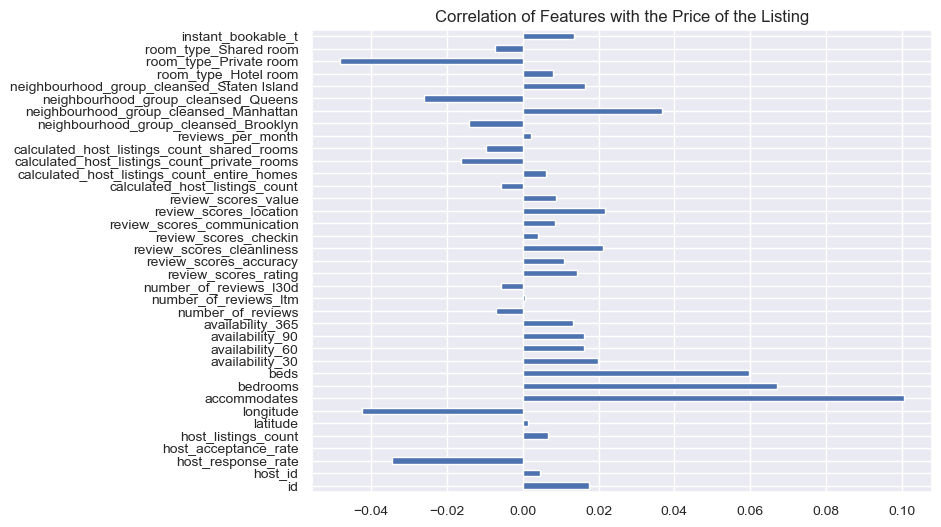

In [172]:
# using standard scaler to standardize features to achieve data that is in standard normal form
s_sc = StandardScaler()
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

# plotting the correlation of all the features with the dependant variable (price)
dataset.drop('price', axis=1).corrwith(dataset.price).plot.barh(figsize=(8, 6), 
                                                        title='Correlation of Features with the Price of the Listing',
                                                        fontsize=10, grid=True)

### Predicting Price for All Listings

We are now running a linear regression model for the price of all listings.

In [239]:
# splitting the data into test and train datasets
X = dataset.drop(['price', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'], axis=1)
y = dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [240]:
# the print_evaluate function is called to generate the MAE, MSE, RMSE, and R2 for in sample and out of sample
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R-Squared', r2_square)

### Predicting Price for Listings < $500

We are now filtering for price less than $500 in order to remove outliers from the dataset.

In [243]:
dataset_filtered = dataset[dataset['price'] < 500]
X = dataset_filtered.drop(['price', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'], axis=1)
y = dataset_filtered['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [251]:
# taking the log of price and splitting data
X = dataset.drop(['price', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'], axis=1)
y = np.log(dataset['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)